## **1. Mount Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Install Dependencies**


In [2]:
!pip install ultralytics
!pip install albumentations opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## **3. Check GPU Availability**


In [3]:
import torch

print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0))

GPU available: True
GPU name: Tesla T4


## **4. Locale Adjustment**


In [4]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

## **5. Define Dataset Path and Validate Annotations**


In [5]:
import os

DATASET_PATH = "/content/drive/MyDrive/pastry_object_detection_computer_vision/dataset"

image_files = [f for f in os.listdir(f"{DATASET_PATH}/train/images") if f.endswith(".jpg")]
annotation_files = [f.replace(".jpg", ".txt") for f in image_files]
for file in annotation_files:
    assert os.path.exists(f"{DATASET_PATH}/train/labels/{file}"), f"Missing annotation file: {file}"
print("✅ All annotations are present!")


✅ All annotations are present!


## **6. Import Libraries**


In [6]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **7. Load the Pretrained YOLOv11 Model**


In [7]:
# Load the pretrained YOLOv11 model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.4MB/s]


## **8. Training Attempt 1**


In [8]:
# Attempt 1 - Model 1
model.train(
    data=f"{DATASET_PATH}/data.yaml",
    epochs=100,
    imgsz=736,
    batch=8,
    patience=20,
    lr0=0.01,
    lrf=0.0001,
    plots=True
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=736, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/train/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [01:04<00:00,  1.08it/s]

train: New cache created: /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

val: New cache created: /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.72G      1.323      3.456      1.608         31        736: 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         20         58     0.0171      0.671     0.0648     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.64G      1.147      3.333      1.477         29        736: 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         20         58     0.0688      0.742       0.17      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.66G      1.073      3.261       1.46         26        736: 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         20         58     0.0698      0.763      0.259      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.67G      1.011      3.196       1.41         32        736: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         20         58     0.0686      0.922      0.304      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.66G      1.006      3.062      1.412         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         20         58     0.0415      0.933      0.307      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.66G      1.069      2.906      1.394         43        736: 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         20         58      0.028      0.989      0.305       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.64G      1.018      2.791      1.391         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         20         58     0.0198          1       0.29      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.66G      1.061      2.755      1.504         29        736: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         20         58      0.426      0.098      0.305       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.64G      1.089      2.654      1.465         25        736: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         20         58      0.223      0.154      0.296      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.64G      1.067      2.513      1.439         32        736: 100%|██████████| 9/9 [00:01<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         20         58      0.195       0.18      0.324      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.64G      1.185      2.507      1.522         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         20         58      0.214      0.393      0.266      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.63G      1.169       2.36      1.512         36        736: 100%|██████████| 9/9 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         20         58       0.21      0.519      0.286      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.63G      1.153      2.198      1.478         39        736: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         20         58      0.288       0.34      0.321      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.64G      1.098       2.21      1.492         24        736: 100%|██████████| 9/9 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


                   all         20         58      0.354      0.302      0.346      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.64G      1.113      2.145      1.459         26        736: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         20         58       0.24      0.357      0.349      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.64G      1.068      2.107      1.419         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         20         58      0.277       0.54      0.382      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.64G      1.018      2.131      1.391         17        736: 100%|██████████| 9/9 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         20         58      0.336      0.393      0.434      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.64G      1.058      2.014      1.455         30        736: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         20         58      0.477      0.475      0.527      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.67G      1.017      2.039       1.44         20        736: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         20         58      0.754      0.472      0.558      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.62G      1.095      1.847      1.415         28        736: 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         20         58      0.659      0.466       0.57       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.62G      1.037      1.965       1.43         31        736: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         20         58      0.764      0.542      0.614       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.64G      1.029      1.889      1.399         32        736: 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         20         58       0.68      0.479      0.579      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.65G     0.9961      1.789      1.327         28        736: 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         20         58      0.465      0.551      0.548      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.66G     0.9471      1.708      1.323         18        736: 100%|██████████| 9/9 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         20         58      0.433      0.544      0.509       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.64G     0.9423      1.558      1.314         30        736: 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         20         58       0.86      0.431      0.525      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.64G     0.9494      1.584      1.302         31        736: 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         20         58      0.717      0.503      0.534      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.64G     0.9632      1.503      1.304         31        736: 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         20         58      0.587      0.638      0.571      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.63G     0.9619      1.574       1.29         14        736: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         20         58      0.616      0.601      0.626       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.66G     0.9604      1.544      1.283         29        736: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         20         58      0.607      0.567      0.611      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.64G     0.9552      1.454      1.276         43        736: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         20         58      0.645      0.461      0.538      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.63G      1.004      1.456      1.369         32        736: 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         20         58      0.548      0.472      0.465      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.67G     0.9411      1.534      1.387         29        736: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         20         58      0.414       0.45      0.422      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.67G     0.8955       1.41      1.267         36        736: 100%|██████████| 9/9 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         20         58      0.339      0.445      0.395      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.67G     0.9173      1.466      1.313         33        736: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         20         58       0.41      0.477      0.471      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.63G     0.8826      1.381      1.259         27        736: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         20         58      0.808      0.552      0.658      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.64G      0.906      1.455      1.323         31        736: 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         20         58      0.687      0.561      0.662      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.66G     0.8808      1.291      1.255         27        736: 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         20         58      0.639      0.629      0.703      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.64G     0.8878      1.355      1.235         42        736: 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         20         58      0.718      0.615      0.703      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.67G     0.8941      1.332      1.249         27        736: 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         20         58      0.629      0.656      0.707      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.64G     0.8237      1.201      1.212         27        736: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         20         58      0.522       0.77      0.661      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.63G     0.8883      1.334      1.245         45        736: 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         20         58      0.518      0.777      0.592      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.64G     0.8849      1.225      1.218         35        736: 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         20         58      0.475      0.644      0.555      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.63G     0.8987      1.216      1.239         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         20         58      0.656      0.585      0.624       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.62G     0.8871      1.213      1.251         26        736: 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         20         58      0.616      0.591      0.671      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.64G     0.8826      1.228      1.255         32        736: 100%|██████████| 9/9 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         20         58      0.728      0.585      0.712      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.64G     0.8353       1.17       1.19         43        736: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         20         58       0.78      0.569      0.692      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.64G     0.8302      1.108      1.161         25        736: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         20         58      0.656      0.577       0.63      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.64G     0.8068      1.183      1.177         20        736: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         20         58       0.52      0.669      0.603      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.64G     0.7862      1.103      1.191         34        736: 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         20         58      0.482      0.689       0.61      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.64G     0.8173       1.13      1.217         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         20         58      0.572      0.657      0.684      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.67G     0.7658      1.064      1.151         28        736: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         20         58      0.688      0.542      0.632      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.65G     0.7705      1.106      1.171         19        736: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         20         58      0.696      0.626      0.678      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.66G     0.7917      1.053      1.204         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         20         58      0.749       0.66      0.714      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.64G     0.7481      1.126       1.15         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         20         58       0.75      0.644      0.725      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.64G     0.7894      1.115      1.213         25        736: 100%|██████████| 9/9 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         20         58      0.709      0.643      0.698      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.64G     0.7249      1.015       1.13         36        736: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         20         58      0.738      0.623      0.691      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.64G      0.742      1.037      1.135         24        736: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         20         58      0.713      0.631      0.724      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.64G     0.7277      1.017      1.151         20        736: 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         20         58      0.797      0.667       0.74      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.63G     0.7482      1.101      1.172         47        736: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         20         58      0.809      0.656      0.732       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.62G     0.7337     0.9547      1.127         43        736: 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         20         58      0.832      0.604       0.72      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.66G     0.7079     0.9516      1.123         30        736: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         20         58      0.817      0.607      0.711      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.64G     0.7322      1.023      1.137         38        736: 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         20         58      0.797      0.659      0.745      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.64G     0.7192     0.9995      1.171         32        736: 100%|██████████| 9/9 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         20         58      0.832      0.684      0.789      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.66G     0.6867     0.8858      1.085         33        736: 100%|██████████| 9/9 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         20         58      0.755      0.688      0.789      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.64G     0.6582     0.8885      1.075         29        736: 100%|██████████| 9/9 [00:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         20         58      0.718      0.725      0.804      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.67G     0.7193     0.9448      1.142         34        736: 100%|██████████| 9/9 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         20         58      0.743      0.721      0.796      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.65G     0.6843     0.9151      1.131         34        736: 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         20         58      0.723      0.688      0.779      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.61G     0.6657     0.9561      1.105         14        736: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         20         58      0.673      0.751      0.797      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.64G     0.6917     0.8785      1.109         30        736: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         20         58      0.727      0.744      0.807      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.65G     0.6059     0.8374      1.076         24        736: 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         20         58      0.746      0.776      0.847      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.67G     0.6654      0.898      1.134         20        736: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         20         58      0.821      0.759      0.852      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.67G      0.631     0.8339      1.065         26        736: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         20         58      0.876      0.742      0.831      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.67G     0.6631      0.931      1.109         33        736: 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         20         58      0.832      0.744      0.825      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.67G      0.647     0.8936      1.105         24        736: 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         20         58      0.836      0.747      0.815      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.67G     0.6435     0.8748      1.085         38        736: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         20         58      0.816      0.754      0.809      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.63G     0.6567     0.8864      1.126         25        736: 100%|██████████| 9/9 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         20         58      0.816      0.748       0.79      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.64G     0.7015     0.8586      1.116         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         20         58      0.826      0.755      0.799      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.64G     0.6313     0.8928      1.108         31        736: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         20         58      0.805      0.759      0.803      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.64G     0.5974      0.785      1.057         39        736: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         20         58      0.785      0.769      0.815      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.64G     0.6377     0.8512      1.045         37        736: 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         20         58      0.752      0.795      0.816      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.67G     0.6427     0.8559      1.094         45        736: 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         20         58      0.734       0.79      0.816        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.64G     0.6412     0.8666      1.105         20        736: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         20         58      0.823      0.722      0.812      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.64G     0.5795     0.8097      1.055         24        736: 100%|██████████| 9/9 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         20         58      0.939      0.658      0.801      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.65G     0.5965     0.7849      1.041         34        736: 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         20         58       0.86      0.697        0.8      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.67G      0.642     0.7965      1.082         23        736: 100%|██████████| 9/9 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         20         58      0.916      0.697       0.81      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.65G     0.6209     0.8545      1.102         24        736: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         20         58      0.774      0.758      0.812      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.64G     0.6044     0.8262      1.078         35        736: 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         20         58      0.752      0.775      0.801      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.64G     0.6012     0.7787      1.059         43        736: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


                   all         20         58       0.77      0.764      0.804      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.65G     0.5928     0.7639       1.06         35        736: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         20         58      0.789      0.784      0.806      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.63G     0.5891     0.8382      1.064         23        736: 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         20         58      0.829      0.784      0.817      0.614


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.68G     0.5447      1.034      1.081         14        736: 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         20         58      0.813      0.786      0.827       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.61G     0.4816     0.9825     0.9768         13        736: 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         20         58      0.743      0.792      0.826      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.62G     0.5075      1.014       1.02         12        736: 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         20         58      0.763      0.833      0.831      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.63G     0.4521     0.9439     0.9483         10        736: 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         20         58      0.763      0.798      0.816      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.63G     0.4665     0.9504     0.9748         15        736: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         20         58      0.807      0.739      0.809      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.63G      0.482     0.9818     0.9911         17        736: 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         20         58      0.794      0.735        0.8      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.63G     0.5039     0.9513      1.004         27        736: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         20         58      0.848      0.702      0.799      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.65G     0.4405     0.9095     0.9319         12        736: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         20         58      0.845      0.707      0.802       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.63G     0.4696      0.869     0.9768         19        736: 100%|██████████| 9/9 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         20         58      0.742      0.798      0.798      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.63G     0.4809     0.9189     0.9856         16        736: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         20         58      0.746      0.797      0.798      0.588



100 epochs completed in 0.087 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         20         58      0.814      0.786      0.827      0.631
                  Tart          4          8       0.66      0.488      0.609       0.53
                 donut          4         19          1      0.441      0.614      0.367
                eclair          4          8      0.712          1      0.939      0.779
                muffin          4         10      0.811          1      0.977      0.627
      pain au chocolat          4         13      0.887          1      0.995      0.853
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c69ec88d750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
!ls /content/runs/detect/train


args.yaml					   PR_curve.png        train_batch811.jpg
confusion_matrix_normalized.png			   R_curve.png	       train_batch812.jpg
confusion_matrix.png				   results.csv	       val_batch0_labels.jpg
events.out.tfevents.1739634544.f59514edddd0.193.0  results.png	       val_batch0_pred.jpg
F1_curve.png					   train_batch0.jpg    val_batch1_labels.jpg
labels_correlogram.jpg				   train_batch1.jpg    val_batch1_pred.jpg
labels.jpg					   train_batch2.jpg    weights
P_curve.png					   train_batch810.jpg


### **Visualize Initial Results**


Résultats sur validation set


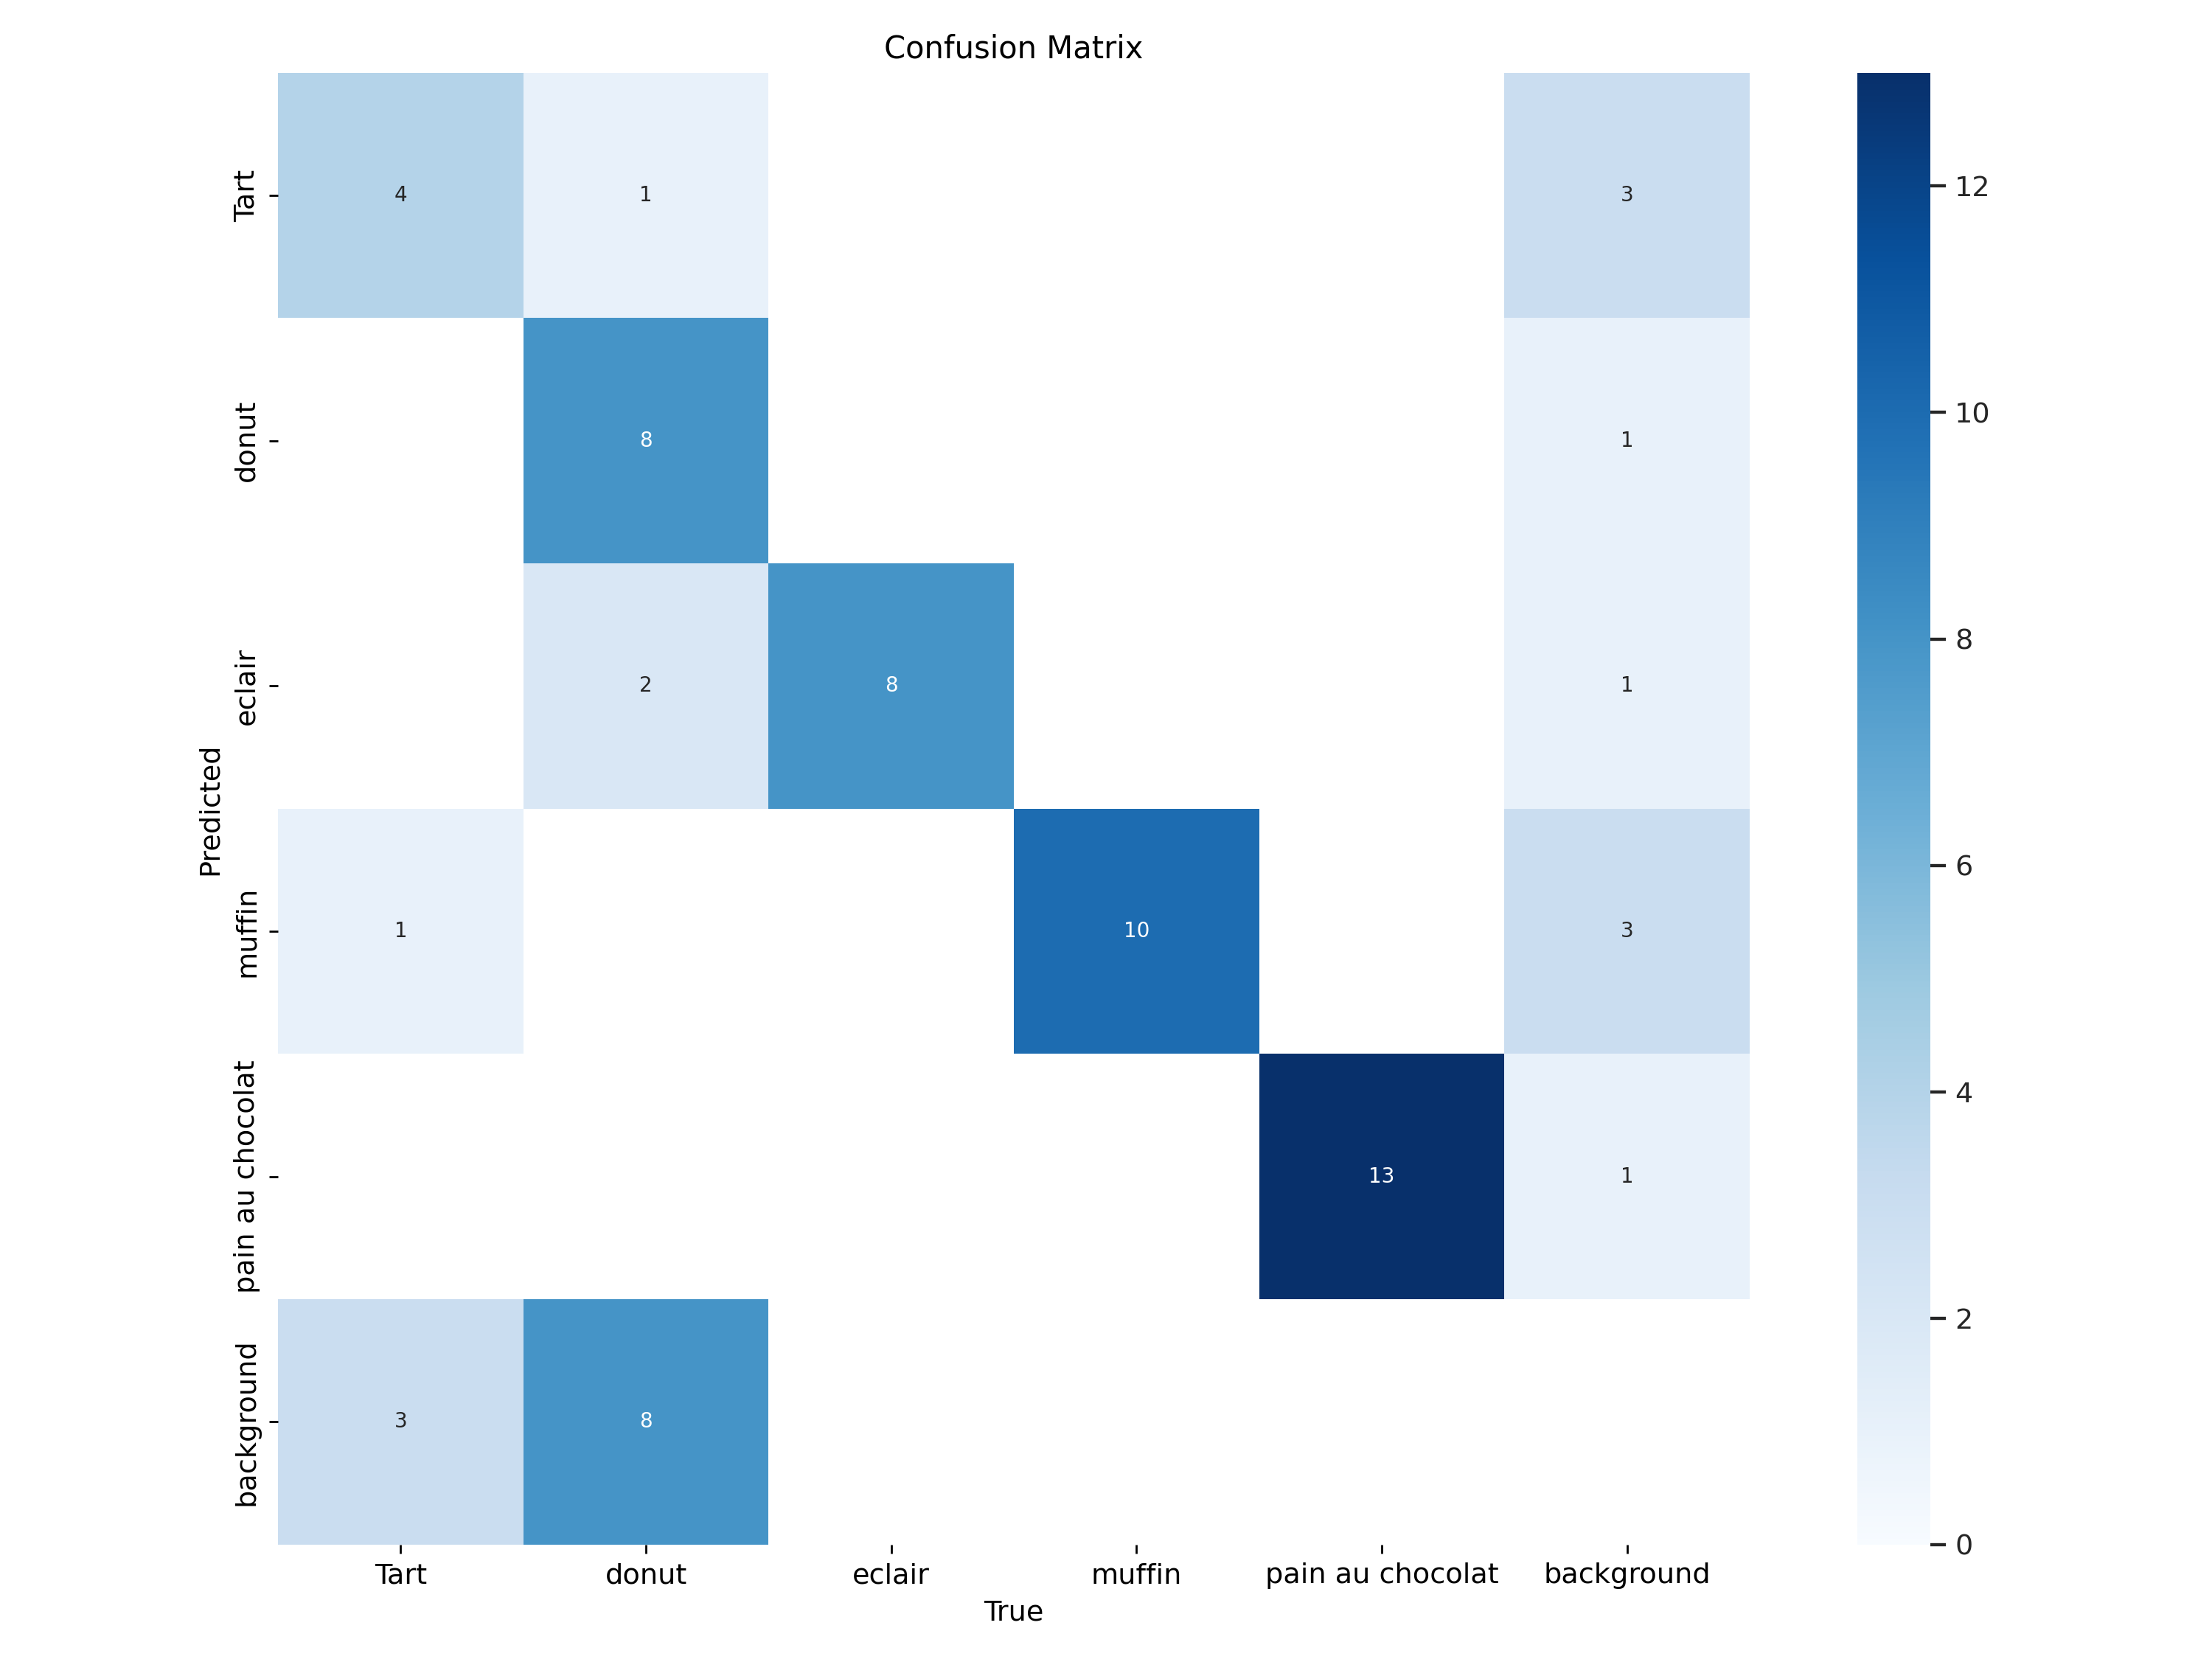

In [10]:
from IPython.display import Image as IPyImage

# Display confusion matrix
IPyImage(filename='/content/runs/detect/train/confusion_matrix.png', width=600)


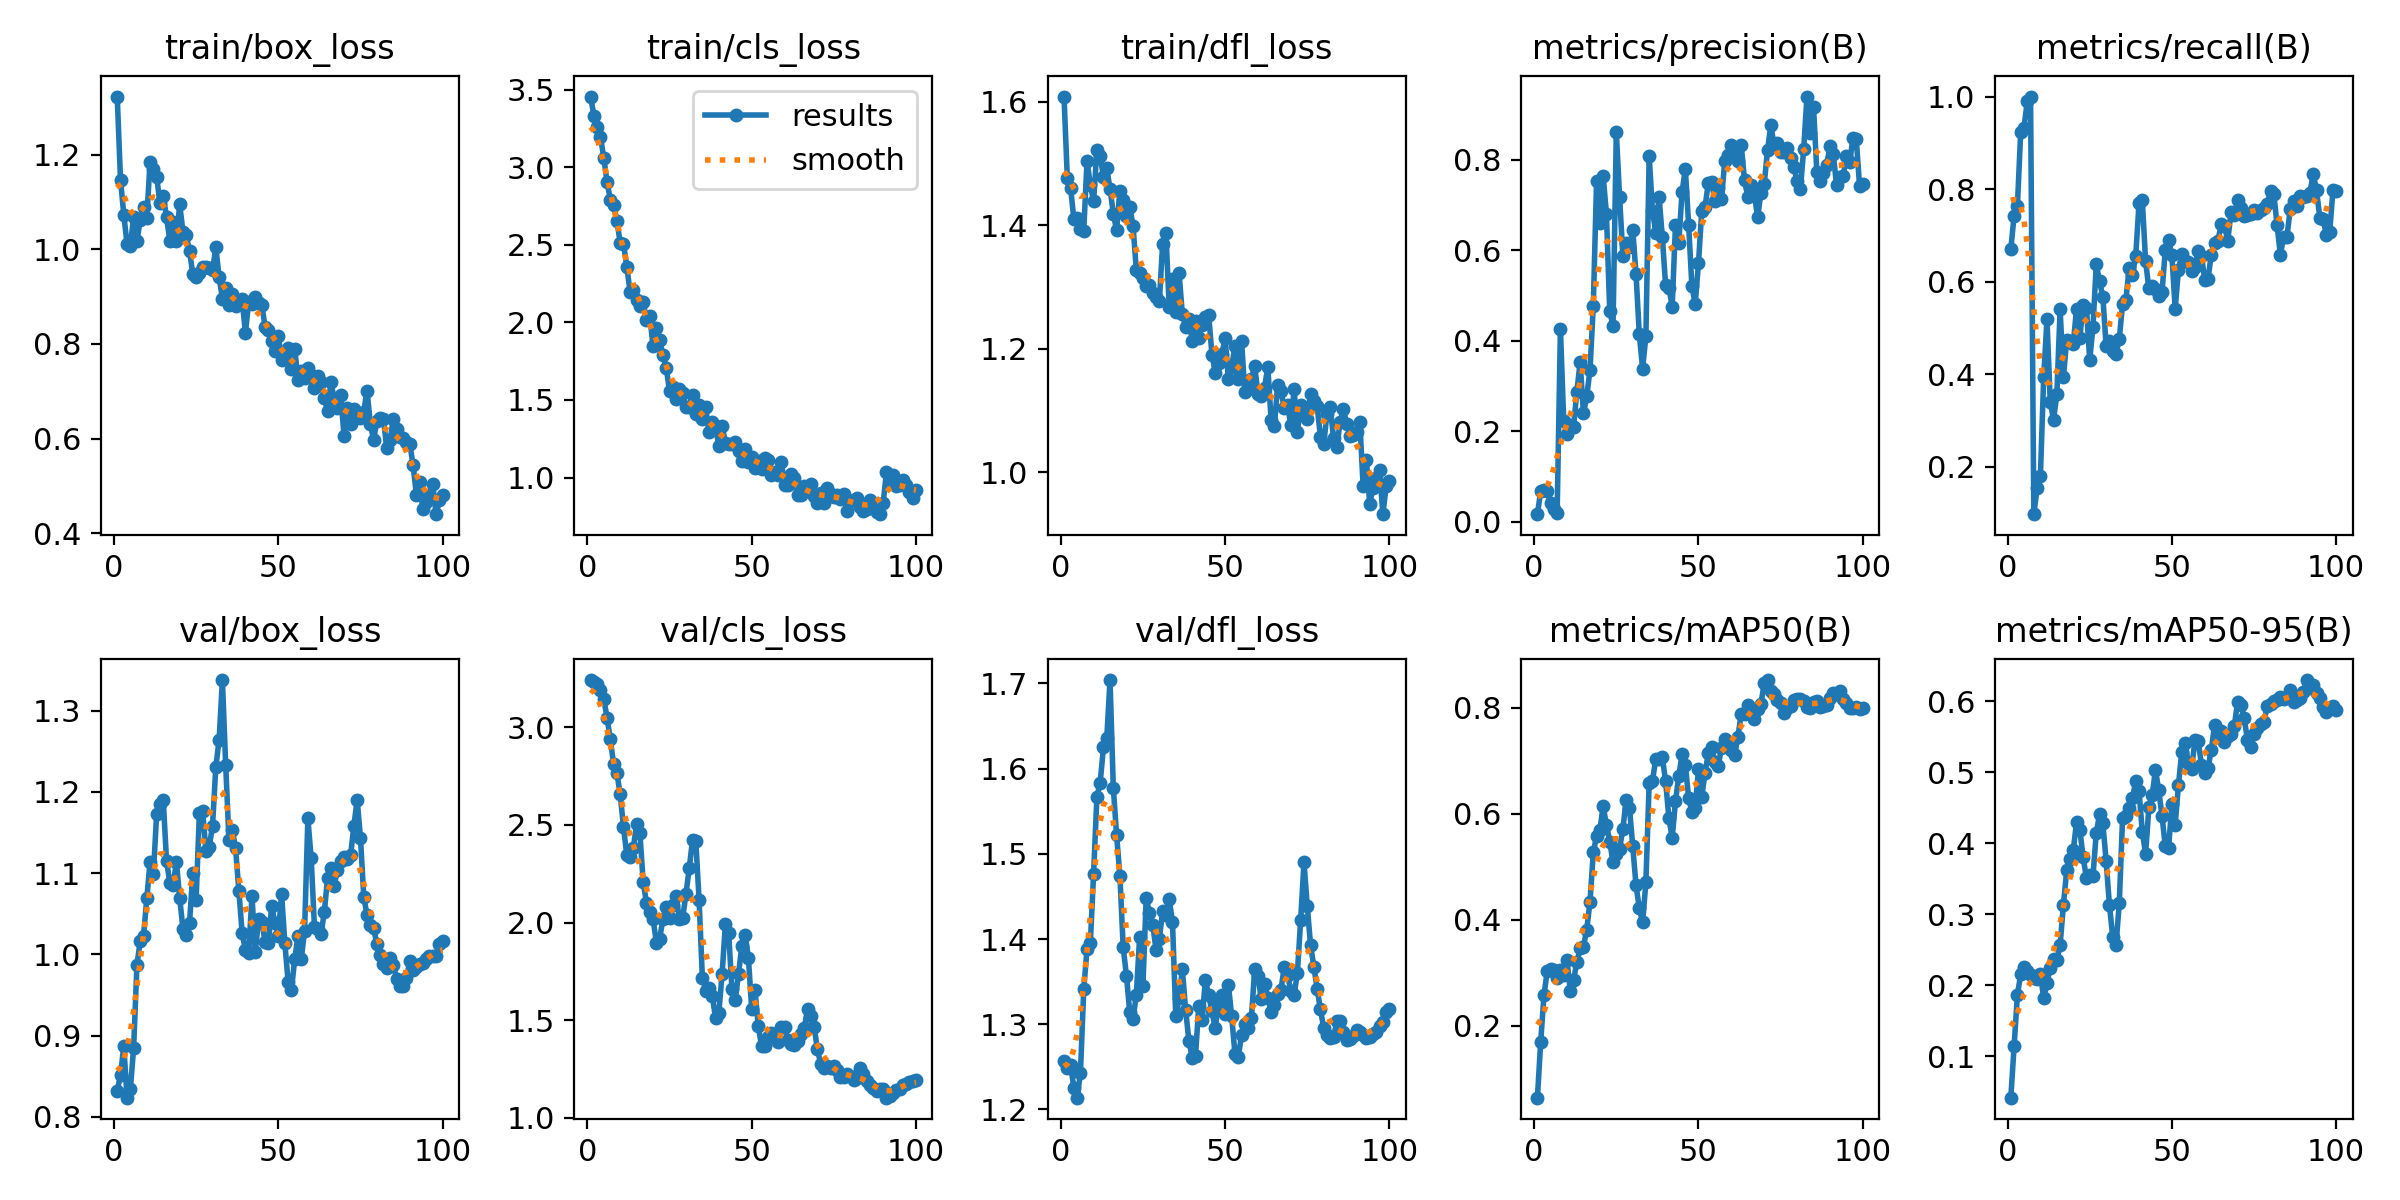

In [11]:
# Display matrix and metrics chart
IPyImage(filename='/content/runs/detect/train/results.png', width=600)

### **Insights & Adjustments**


Observations:
- The training losses decrease steadily and reach low values, indicating effective learning despite slight fluctuations, while validation losses remain higher and more unstable, suggesting mild overfitting or data variability.
- We'll increase the batch size and lower the learning rate to see if this improves results.

Let's proceed with "Model 2."


## **9. Training Attempt 2**


In [12]:
model2 = YOLO("yolo11n.pt")
# Fine-tuning Model - Model 2
model2.train(
    data=f"{DATASET_PATH}/data.yaml",
    epochs=100,
    imgsz=736,
    batch=16,
    patience=20,
    lr0=0.005,
    lrf=0.0001
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=736, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/train/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.41G      1.335      3.459      1.698         21        736: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         20         58    0.00312        0.6     0.0353     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.18G      1.247       3.43      1.579         31        736: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         20         58     0.0698      0.611     0.0861     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.16G      1.152      3.354      1.501         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         20         58     0.0696      0.682      0.177      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.2G      1.035      3.201      1.384         33        736: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         20         58     0.0651      0.799      0.251       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.21G      1.016      3.151      1.401         33        736: 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         20         58     0.0613      0.912      0.298      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.2G     0.9733      3.012      1.313         33        736: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         58     0.0536      0.958      0.315      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.19G     0.9992      2.871      1.369         29        736: 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         20         58     0.0383      0.968      0.309      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.19G      1.042      2.798      1.432         32        736: 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20         58     0.0386      0.968      0.293      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.22G      1.012      2.567      1.401         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         20         58     0.0432      0.989      0.261      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.18G      1.068      2.363       1.41         41        736: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         20         58     0.0368          1      0.257      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.18G      1.136      2.457      1.468         34        736: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20         58     0.0235      0.989      0.276      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.19G      1.119       2.32      1.503         38        736: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         20         58      0.075      0.947      0.335      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.19G      1.118      2.279      1.484         27        736: 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         58      0.153      0.753      0.346      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.18G       1.05      2.137      1.466         26        736: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20         58      0.906     0.0779      0.314      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.19G      1.023      2.187       1.47         19        736: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         20         58      0.647      0.188      0.355      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       3.2G      1.065      2.021      1.434         39        736: 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         20         58      0.487      0.178      0.389      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.19G      1.071      1.885      1.422         19        736: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20         58      0.486      0.436       0.53      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.19G      1.048      1.861      1.454         29        736: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         20         58      0.692      0.347      0.589      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.2G      1.026      1.918      1.406         19        736: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         20         58      0.543      0.463      0.544      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.21G      1.066      1.809       1.38         33        736: 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         20         58        0.5      0.461      0.551      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.16G      1.052      1.879      1.419         29        736: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         20         58      0.472      0.539      0.545      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.19G      1.048      1.639      1.379         38        736: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         20         58      0.513      0.413      0.509      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.21G     0.9736      1.423       1.35         42        736: 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         20         58      0.542       0.43      0.507      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.22G     0.9621      1.499      1.346         29        736: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20         58      0.545      0.484      0.532      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.18G     0.9396      1.426      1.257         38        736: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         20         58      0.586      0.485      0.562      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.21G     0.9719      1.482      1.355         37        736: 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         20         58      0.502      0.511      0.516      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.21G     0.9317      1.421      1.303         31        736: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         20         58      0.522      0.491      0.468      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.21G      0.946      1.468      1.312         18        736: 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         20         58      0.518       0.56      0.501      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.19G     0.9916      1.466      1.335         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         20         58      0.623      0.458      0.486      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.22G     0.8979      1.279       1.25         49        736: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         20         58      0.669      0.459      0.519      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.21G     0.8679      1.278      1.278         27        736: 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20         58      0.497      0.472      0.503      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.19G     0.9319       1.42       1.33         30        736: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         20         58      0.637      0.456       0.47      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.19G     0.9393      1.326      1.288         42        736: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         20         58      0.535      0.477      0.459      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.19G     0.9136      1.377      1.272         46        736: 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         20         58      0.549      0.543      0.507      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.22G     0.8662      1.217      1.227         27        736: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         20         58      0.571      0.523      0.556      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.21G     0.8717      1.287       1.25         35        736: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         20         58      0.715      0.581      0.643      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.18G     0.8475      1.254      1.231         22        736: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         20         58      0.826      0.564      0.702      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.22G     0.8145       1.13      1.183         35        736: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         20         58      0.634      0.697      0.733      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.21G     0.8566      1.143      1.246         22        736: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         20         58      0.588      0.771      0.713      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.21G     0.8555      1.185      1.205         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20         58      0.683      0.656      0.653      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.16G     0.8828       1.12       1.23         44        736: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         20         58      0.602      0.666      0.662      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.22G     0.8286      1.079      1.187         36        736: 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         20         58      0.582      0.596      0.638      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.2G     0.7754      1.072      1.144         33        736: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20         58      0.652      0.512      0.627      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.2G     0.8288       1.25       1.25         15        736: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         20         58      0.667      0.588      0.675      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.18G     0.8707      1.149      1.213         36        736: 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         20         58      0.729      0.631      0.704      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.19G     0.8118      1.031      1.154         32        736: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20         58      0.838      0.648      0.756      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.2G     0.7975      1.127      1.176         20        736: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         20         58      0.874      0.668      0.778      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.17G     0.7827      1.138      1.152         28        736: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         20         58      0.848      0.505      0.692      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.19G     0.7371       0.99      1.104         36        736: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         20         58      0.728      0.488      0.637      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.21G     0.8194      1.078       1.17         34        736: 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20         58      0.514      0.623       0.61      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.21G     0.7293      1.011      1.122         27        736: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         20         58      0.488       0.62      0.628      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.2G      0.722     0.9679      1.143         25        736: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20         58       0.49      0.683      0.667      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.19G     0.6954     0.9406      1.111         34        736: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         20         58      0.448      0.696      0.649      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.21G     0.7987      1.033      1.185         29        736: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         20         58      0.574      0.619      0.581      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       3.2G     0.7843      1.049      1.176         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20         58      0.554      0.636      0.543      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.21G     0.7224     0.9732      1.149         19        736: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         20         58      0.499      0.543      0.539       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.19G     0.7345     0.9793      1.118         41        736: 100%|██████████| 5/5 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         20         58      0.534      0.544      0.563       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.22G     0.7678      1.019      1.174         23        736: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         20         58      0.603      0.552      0.568      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.21G      0.728     0.9357      1.119         44        736: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         20         58      0.559      0.567      0.584      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.2G     0.7166     0.9341      1.127         38        736: 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         20         58       0.67      0.692      0.731      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.18G     0.6551     0.9161      1.104         30        736: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         20         58      0.773       0.67      0.782      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.22G     0.7132     0.9054      1.138         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         20         58      0.727      0.713      0.795      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.2G     0.6855      0.898      1.091         37        736: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         20         58      0.651      0.816      0.818      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       3.2G     0.6686     0.8314      1.076         32        736: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         20         58       0.82      0.731      0.833      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.19G     0.6442     0.9237      1.058         30        736: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         20         58      0.788      0.764      0.827      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.21G     0.6128     0.8057      1.063         31        736: 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         20         58      0.853      0.699      0.835      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.2G     0.7313     0.8969      1.167         38        736: 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         20         58      0.757      0.776      0.814      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.2G     0.6793     0.8706      1.105         23        736: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         58      0.698      0.726      0.752      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.19G     0.6568     0.8103      1.082         31        736: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20         58      0.628      0.616      0.682      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.22G     0.6619     0.8564      1.093         30        736: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         20         58      0.543      0.707      0.638      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.2G     0.5864      0.765      1.028         19        736: 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         20         58      0.669      0.511      0.613      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.18G     0.6379     0.8168      1.027         28        736: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         20         58      0.706      0.542      0.664      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.18G     0.5884     0.8151      1.062         18        736: 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         20         58      0.789      0.487        0.7       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.19G     0.6131      0.873      1.098         20        736: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         20         58      0.612      0.736      0.736      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.21G     0.5932     0.8222      1.059         29        736: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         20         58      0.654      0.729      0.758      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.2G     0.6233     0.8215       1.09         25        736: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20         58      0.711      0.599      0.727      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.19G     0.6429     0.8072      1.095         39        736: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         20         58      0.647       0.69      0.739      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.19G     0.5586      0.768      1.044         40        736: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         20         58      0.599      0.777      0.736      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.2G     0.6047     0.8271      1.063         43        736: 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         20         58      0.603      0.745      0.764       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.17G     0.6502     0.7481      1.051         36        736: 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         20         58      0.687      0.731      0.777      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       3.2G     0.5995     0.7982      1.083         38        736: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         20         58      0.731      0.757      0.781      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.19G     0.5849     0.8212      1.086         23        736: 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         20         58      0.717       0.78      0.783      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.21G     0.6304     0.7864      1.089         25        736: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         58      0.719      0.779      0.777      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.22G     0.5577     0.7238      1.032         36        736: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         20         58      0.666      0.721      0.738      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       3.2G     0.6218     0.8668      1.062         21        736: 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         20         58      0.693      0.702      0.739      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.19G     0.6298     0.8413      1.106         26        736: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         20         58      0.668      0.691      0.725      0.517
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 66, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



86 epochs completed in 0.067 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


                   all         20         58      0.854        0.7      0.835      0.621
                  Tart          4          8      0.859      0.375      0.683      0.538
                 donut          4         19      0.916      0.575      0.815       0.58
                eclair          4          8      0.883       0.75      0.866      0.667
                muffin          4         10      0.797        0.8       0.83      0.537
      pain au chocolat          4         13      0.813          1       0.98      0.782
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c69ed5ab310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

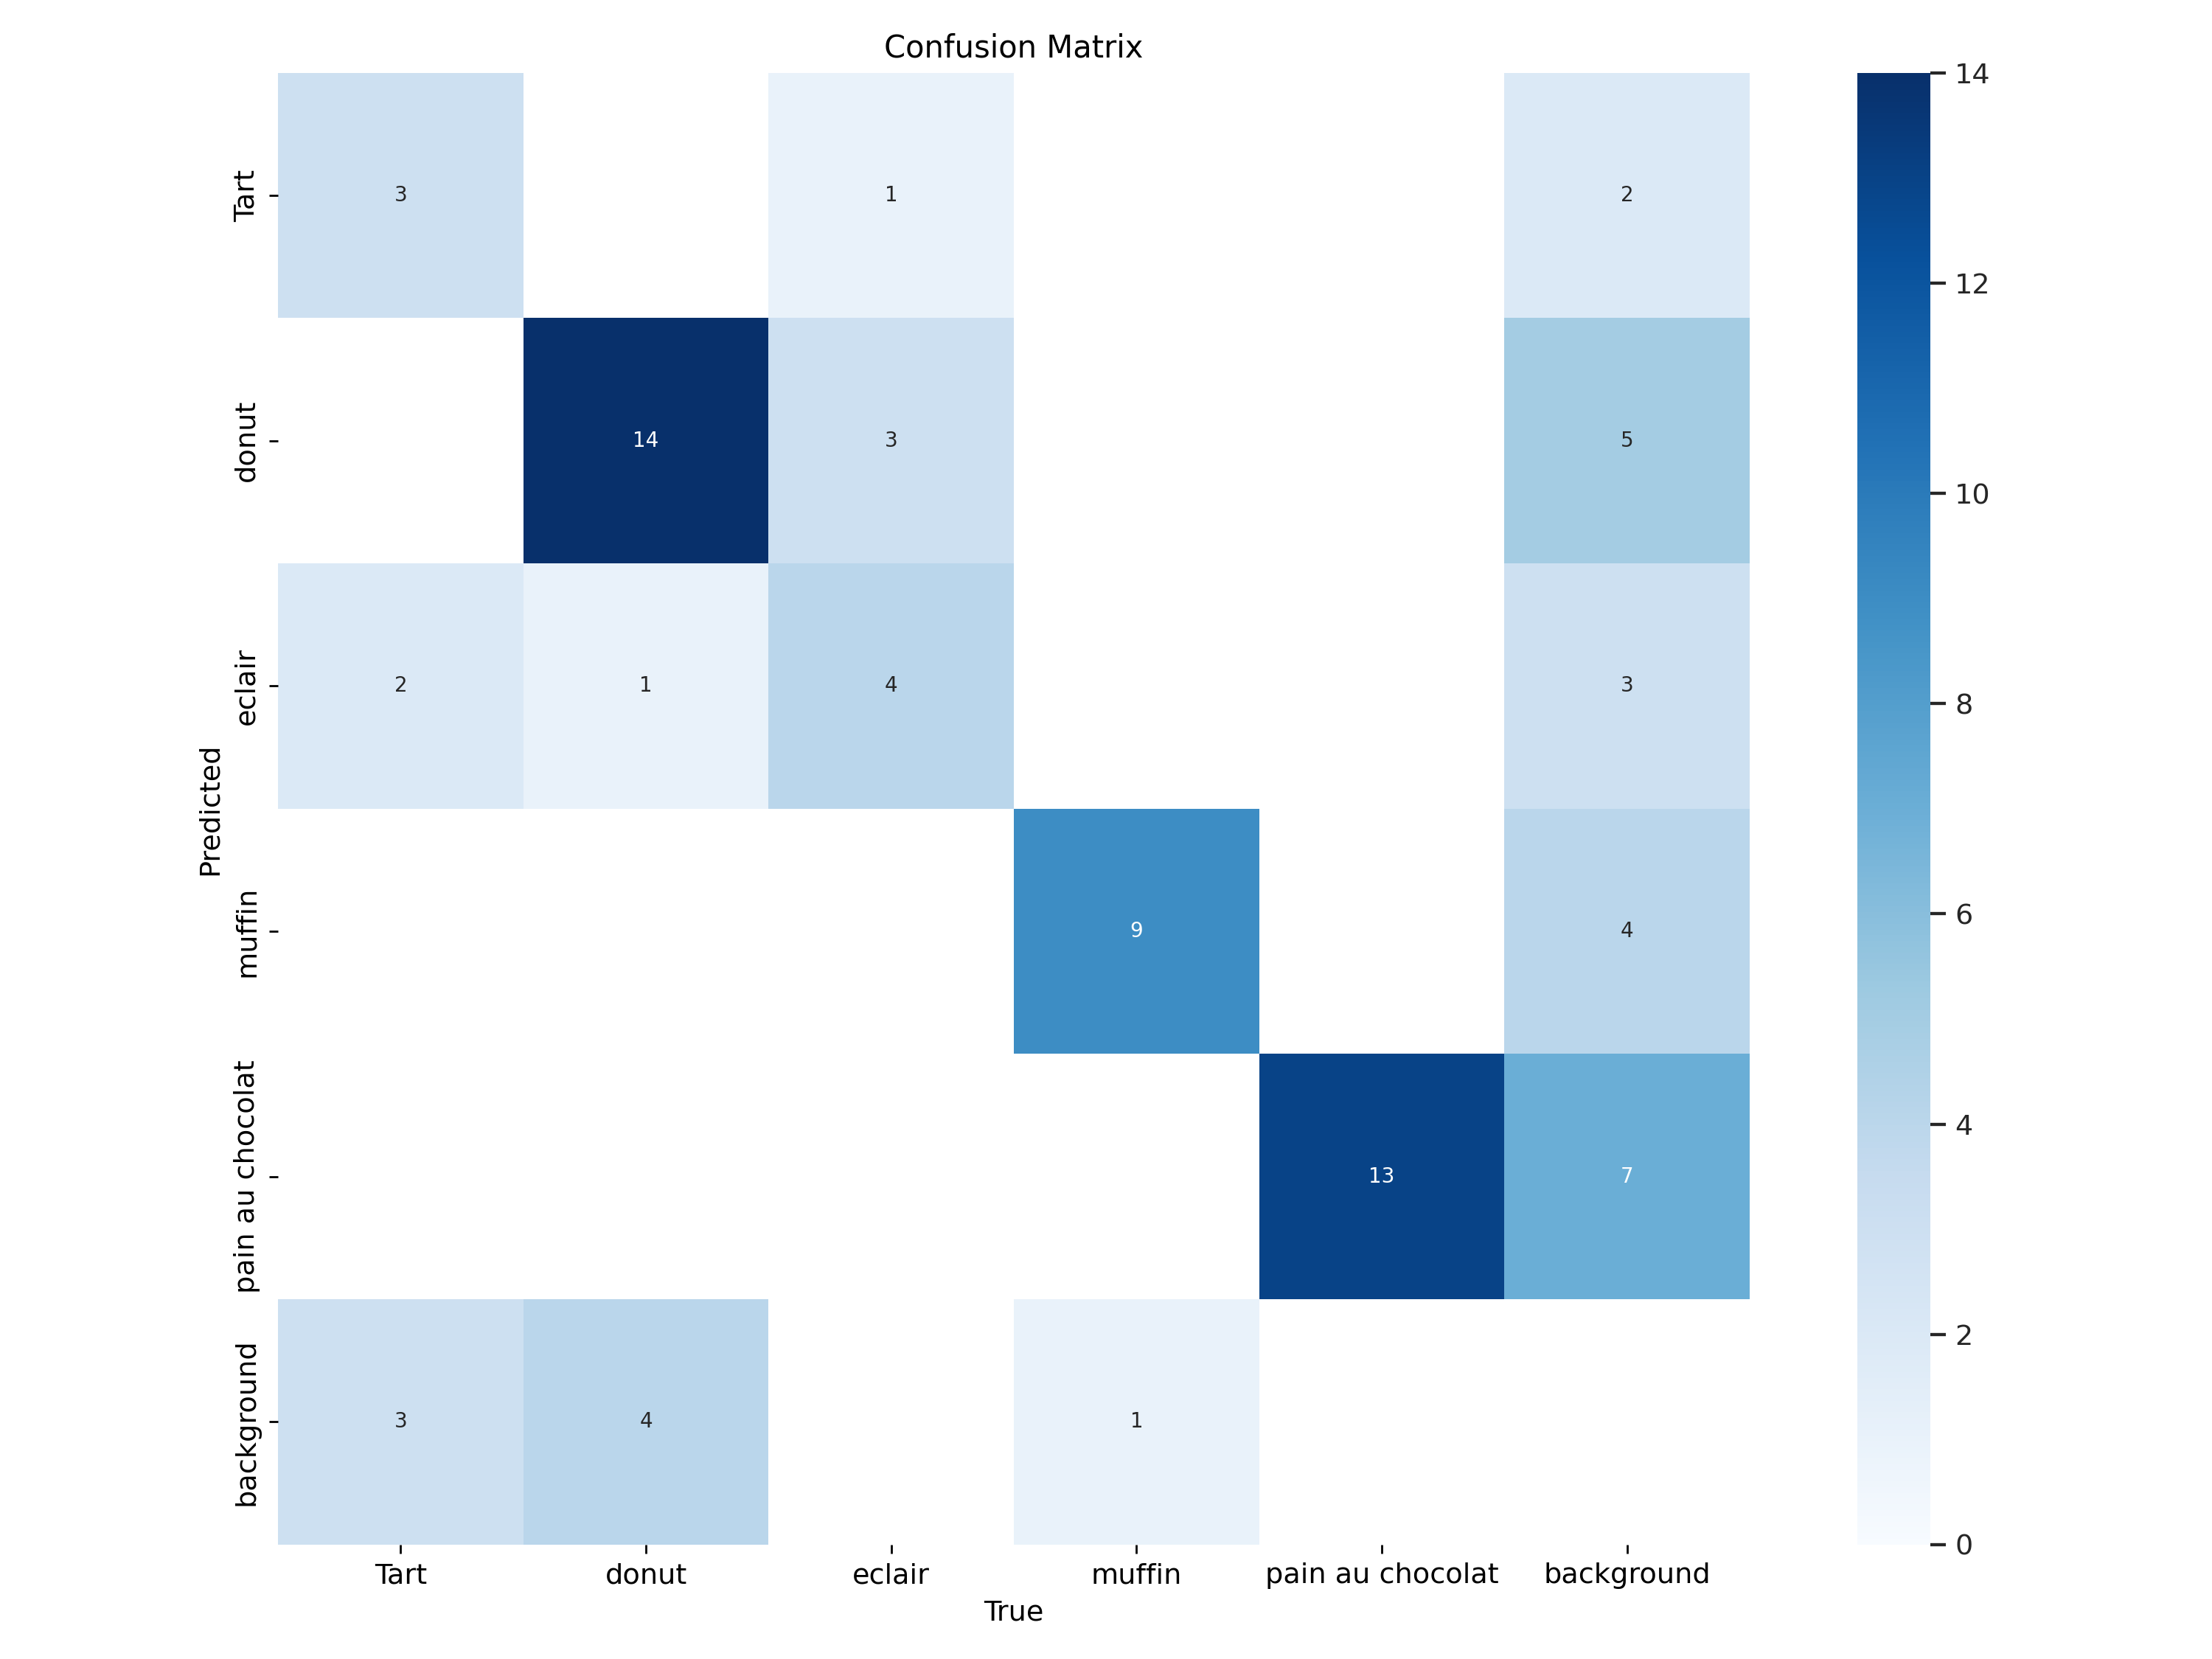

In [13]:
IPyImage(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)


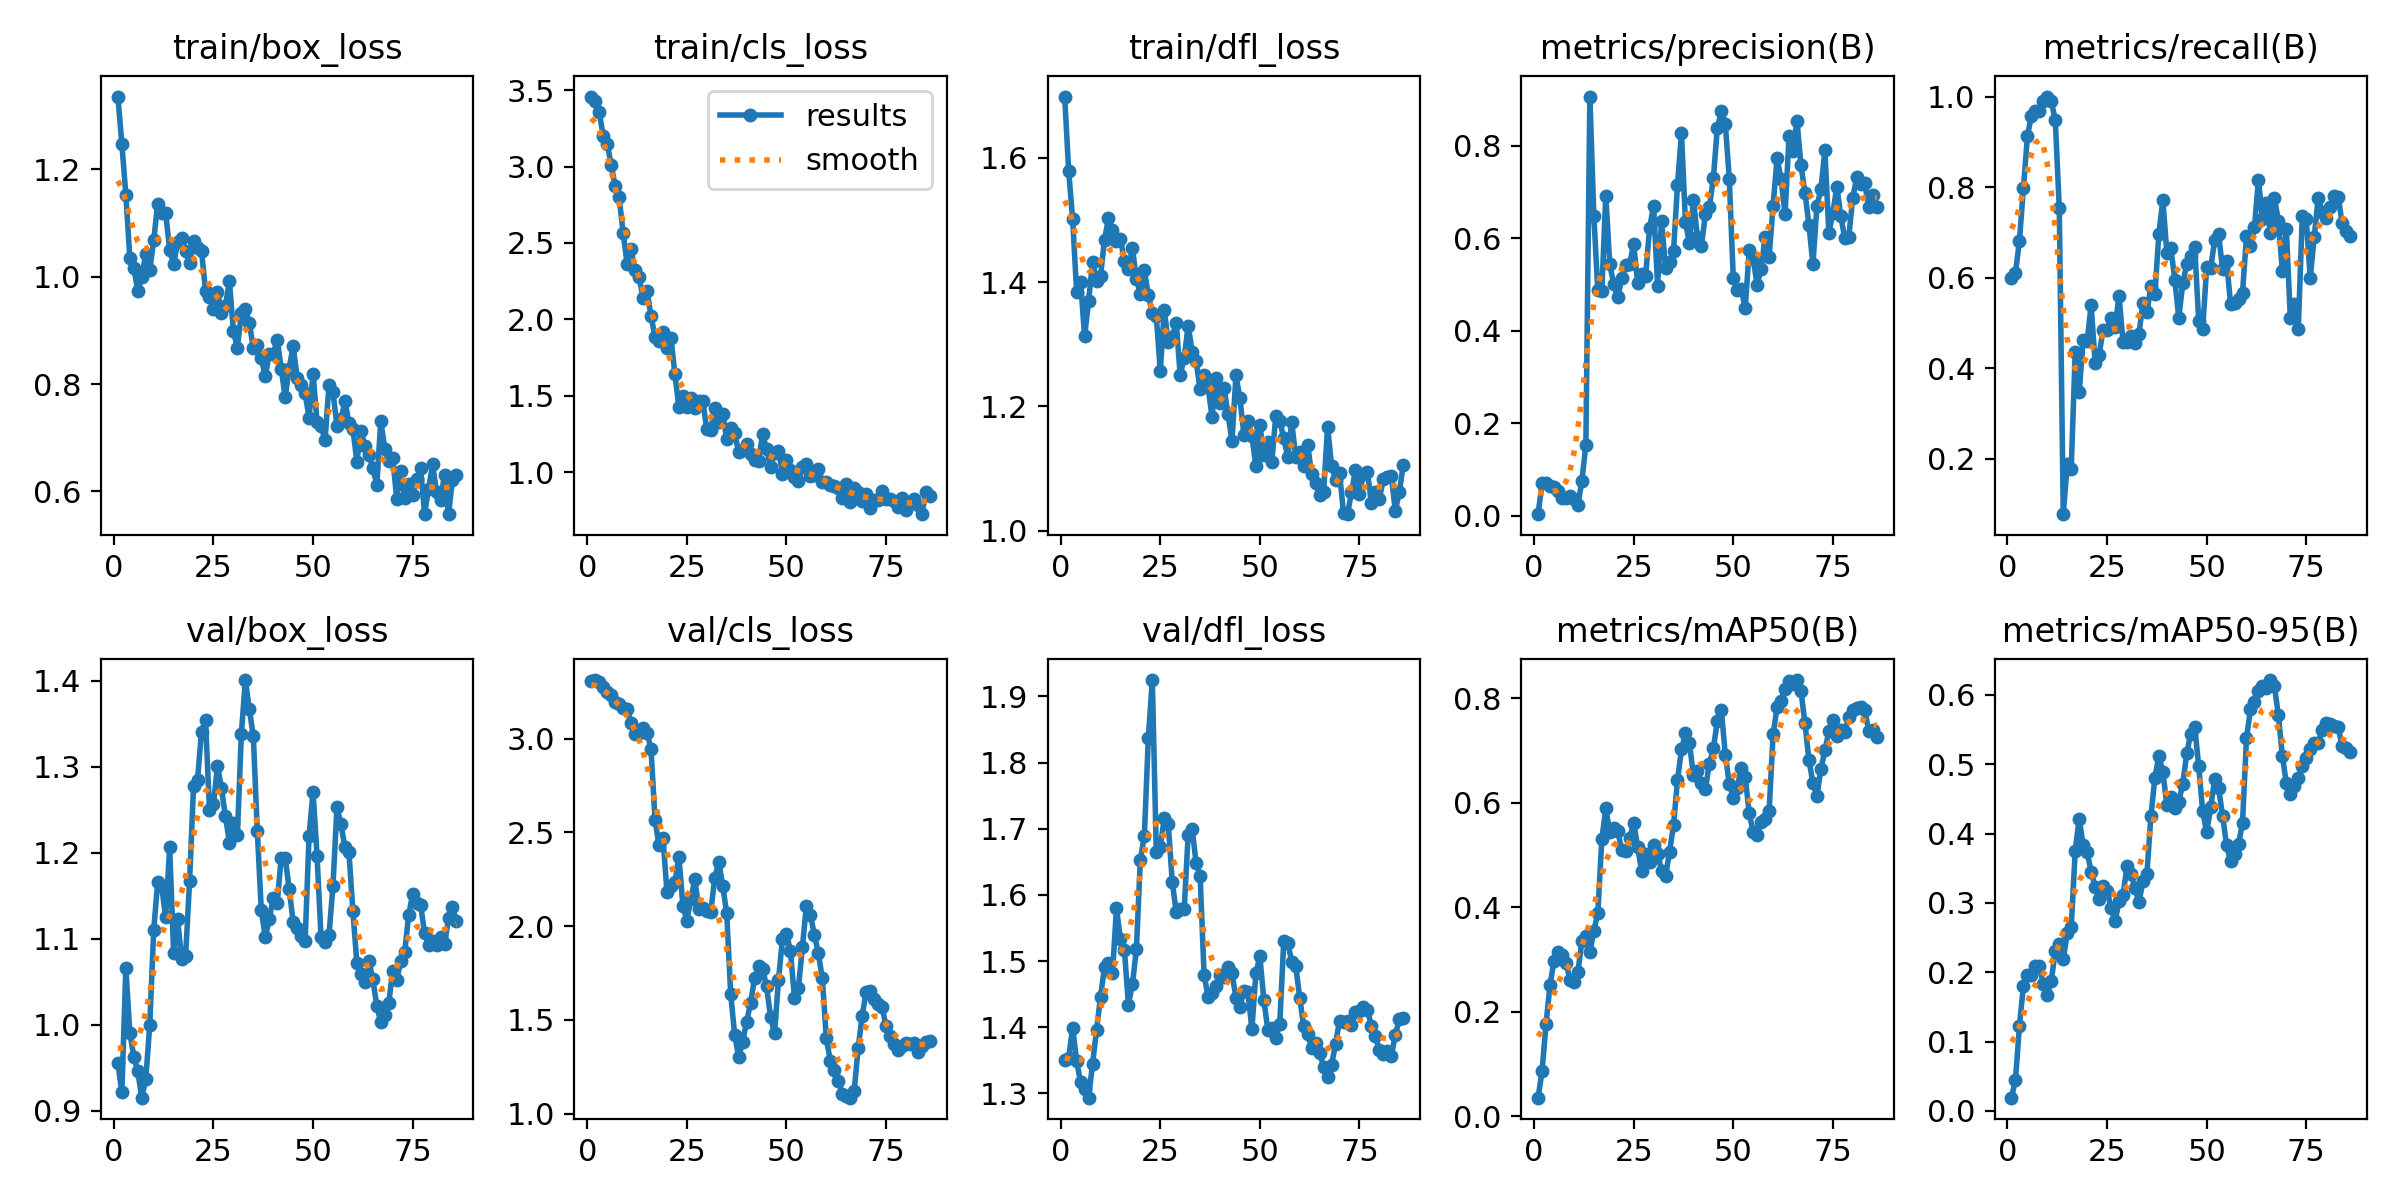

In [14]:
IPyImage(filename='/content/runs/detect/train2/results.png', width=600)


Observations:
- The model is precting a lot of backgroud as some classes but in reality it's just backgroud this is why we will simplify the model.
- We'll change image size, batch size, and possibly
  increase lr0 back to 0.01 for "Model 3."

## **10. Training Attempt 3**


In [15]:
model3 = YOLO("yolo11n.pt")

In [16]:
# Model 3
model3.train(
    data=f"{DATASET_PATH}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    lr0=0.01,
    lrf=0.0001
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

train: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/train/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.57G      1.268      3.418      1.548         21        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         20         58     0.0334      0.767     0.0848     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.48G      1.215       3.38      1.493         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         20         58     0.0608      0.792      0.137     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.47G      1.115      3.305      1.448         28        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         20         58     0.0688      0.849      0.228      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.5G      1.031      3.194      1.345         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         58     0.0622      0.895       0.24      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.5G     0.9955      3.117      1.355         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         20         58     0.0644      0.912      0.292      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.5G     0.9963      2.985      1.282         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20         58     0.0551      0.937      0.297      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.49G      0.954       2.84      1.295         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         20         58     0.0361      0.947      0.306      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.49G      1.023      2.749      1.359         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         20         58     0.0305      0.968      0.313      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.5G      0.972      2.539      1.339         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         20         58     0.0268          1       0.29       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.49G      1.032      2.357      1.345         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         20         58     0.0224          1      0.293      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.47G      1.132      2.405      1.428         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20         58     0.0184      0.974       0.32      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.5G      1.112      2.263      1.411         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20         58      0.196      0.809      0.368      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.49G      1.065      2.189      1.399         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         20         58          1     0.0593       0.39      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.5G       1.07      2.117      1.436         26        640: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20         58      0.585     0.0828      0.478      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.49G     0.9998      2.089      1.404         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20         58      0.659       0.34      0.492      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.5G      1.034      1.955      1.373         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20         58      0.634      0.316      0.484      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.49G      1.104      1.976      1.441         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         20         58      0.525      0.474      0.497      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.49G      1.059      1.775      1.433         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         58       0.51      0.524      0.555      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.5G      0.999      1.893      1.372         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20         58      0.566      0.585      0.572      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.5G      1.082      1.773       1.38         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         20         58      0.631      0.505       0.62      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.47G      1.034      1.802      1.398         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         20         58      0.718      0.566      0.655      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.5G       1.05       1.61       1.38         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         20         58      0.675      0.611      0.676      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.5G     0.9062      1.454      1.278         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         20         58      0.724      0.578      0.672      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.51G     0.9775      1.489      1.328         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         20         58      0.817      0.633      0.712       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.49G     0.9352      1.354      1.252         38        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20         58       0.85      0.615      0.702      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.5G     0.9584      1.405      1.285         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         20         58       0.79      0.591      0.683      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.5G     0.9106      1.303      1.267         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         20         58      0.712      0.597      0.667      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.51G     0.9008      1.398      1.243         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         20         58      0.663      0.661      0.685       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.5G     0.9624      1.331      1.299         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         20         58      0.582        0.7       0.68      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.5G     0.8527      1.216      1.203         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         20         58      0.615      0.755      0.701      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.5G     0.8565      1.237      1.244         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         20         58      0.632      0.765      0.717      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.5G     0.8863      1.291      1.251         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20         58      0.734      0.774      0.741      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.5G     0.8978       1.25      1.249         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         20         58      0.748      0.779      0.762      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.49G     0.8309      1.193      1.194         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         20         58      0.777      0.813       0.78      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.51G     0.8007      1.121      1.153         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         20         58        0.8      0.825      0.806      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.5G     0.8228      1.239      1.201         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         20         58      0.813      0.825      0.816      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.49G     0.7439      1.146      1.152         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         58      0.789      0.806      0.824      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.5G      0.787      1.031      1.152         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20         58      0.743      0.811      0.831      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.5G     0.7847      1.071       1.18         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         20         58      0.736      0.812      0.835      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.5G     0.8189      1.156      1.156         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         20         58      0.795       0.82       0.85      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.54G     0.7546      1.423       1.15         14        640: 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         20         58      0.846      0.807      0.871      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.47G     0.7034      1.244      1.105         16        640: 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20         58      0.853        0.8      0.863      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.46G      0.684       1.22      1.137         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         20         58      0.783      0.825      0.842      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.47G     0.6942      1.237      1.054         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20         58      0.932      0.665      0.811      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.46G     0.6721      1.307      1.118          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         20         58      0.912      0.665      0.795      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.46G      0.688      1.227       1.08         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         20         58      0.941       0.66      0.812      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.47G     0.6629      1.303      1.089         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         20         58      0.822      0.735       0.82      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.46G     0.6422      1.199      1.029         16        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         20         58      0.951      0.668      0.825      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.46G     0.6214      1.185       1.04         13        640: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         20         58      0.783      0.819      0.834      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.46G     0.6416      1.289      1.092         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         20         58      0.782       0.79      0.843      0.604



50 epochs completed in 0.038 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


                   all         20         58      0.851        0.8      0.863      0.626
                  Tart          4          8      0.768      0.625      0.772      0.577
                 donut          4         19          1      0.627      0.777      0.491
                eclair          4          8      0.804       0.75      0.861      0.649
                muffin          4         10      0.821          1      0.908      0.583
      pain au chocolat          4         13      0.859          1      0.995      0.832
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6a4b647b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

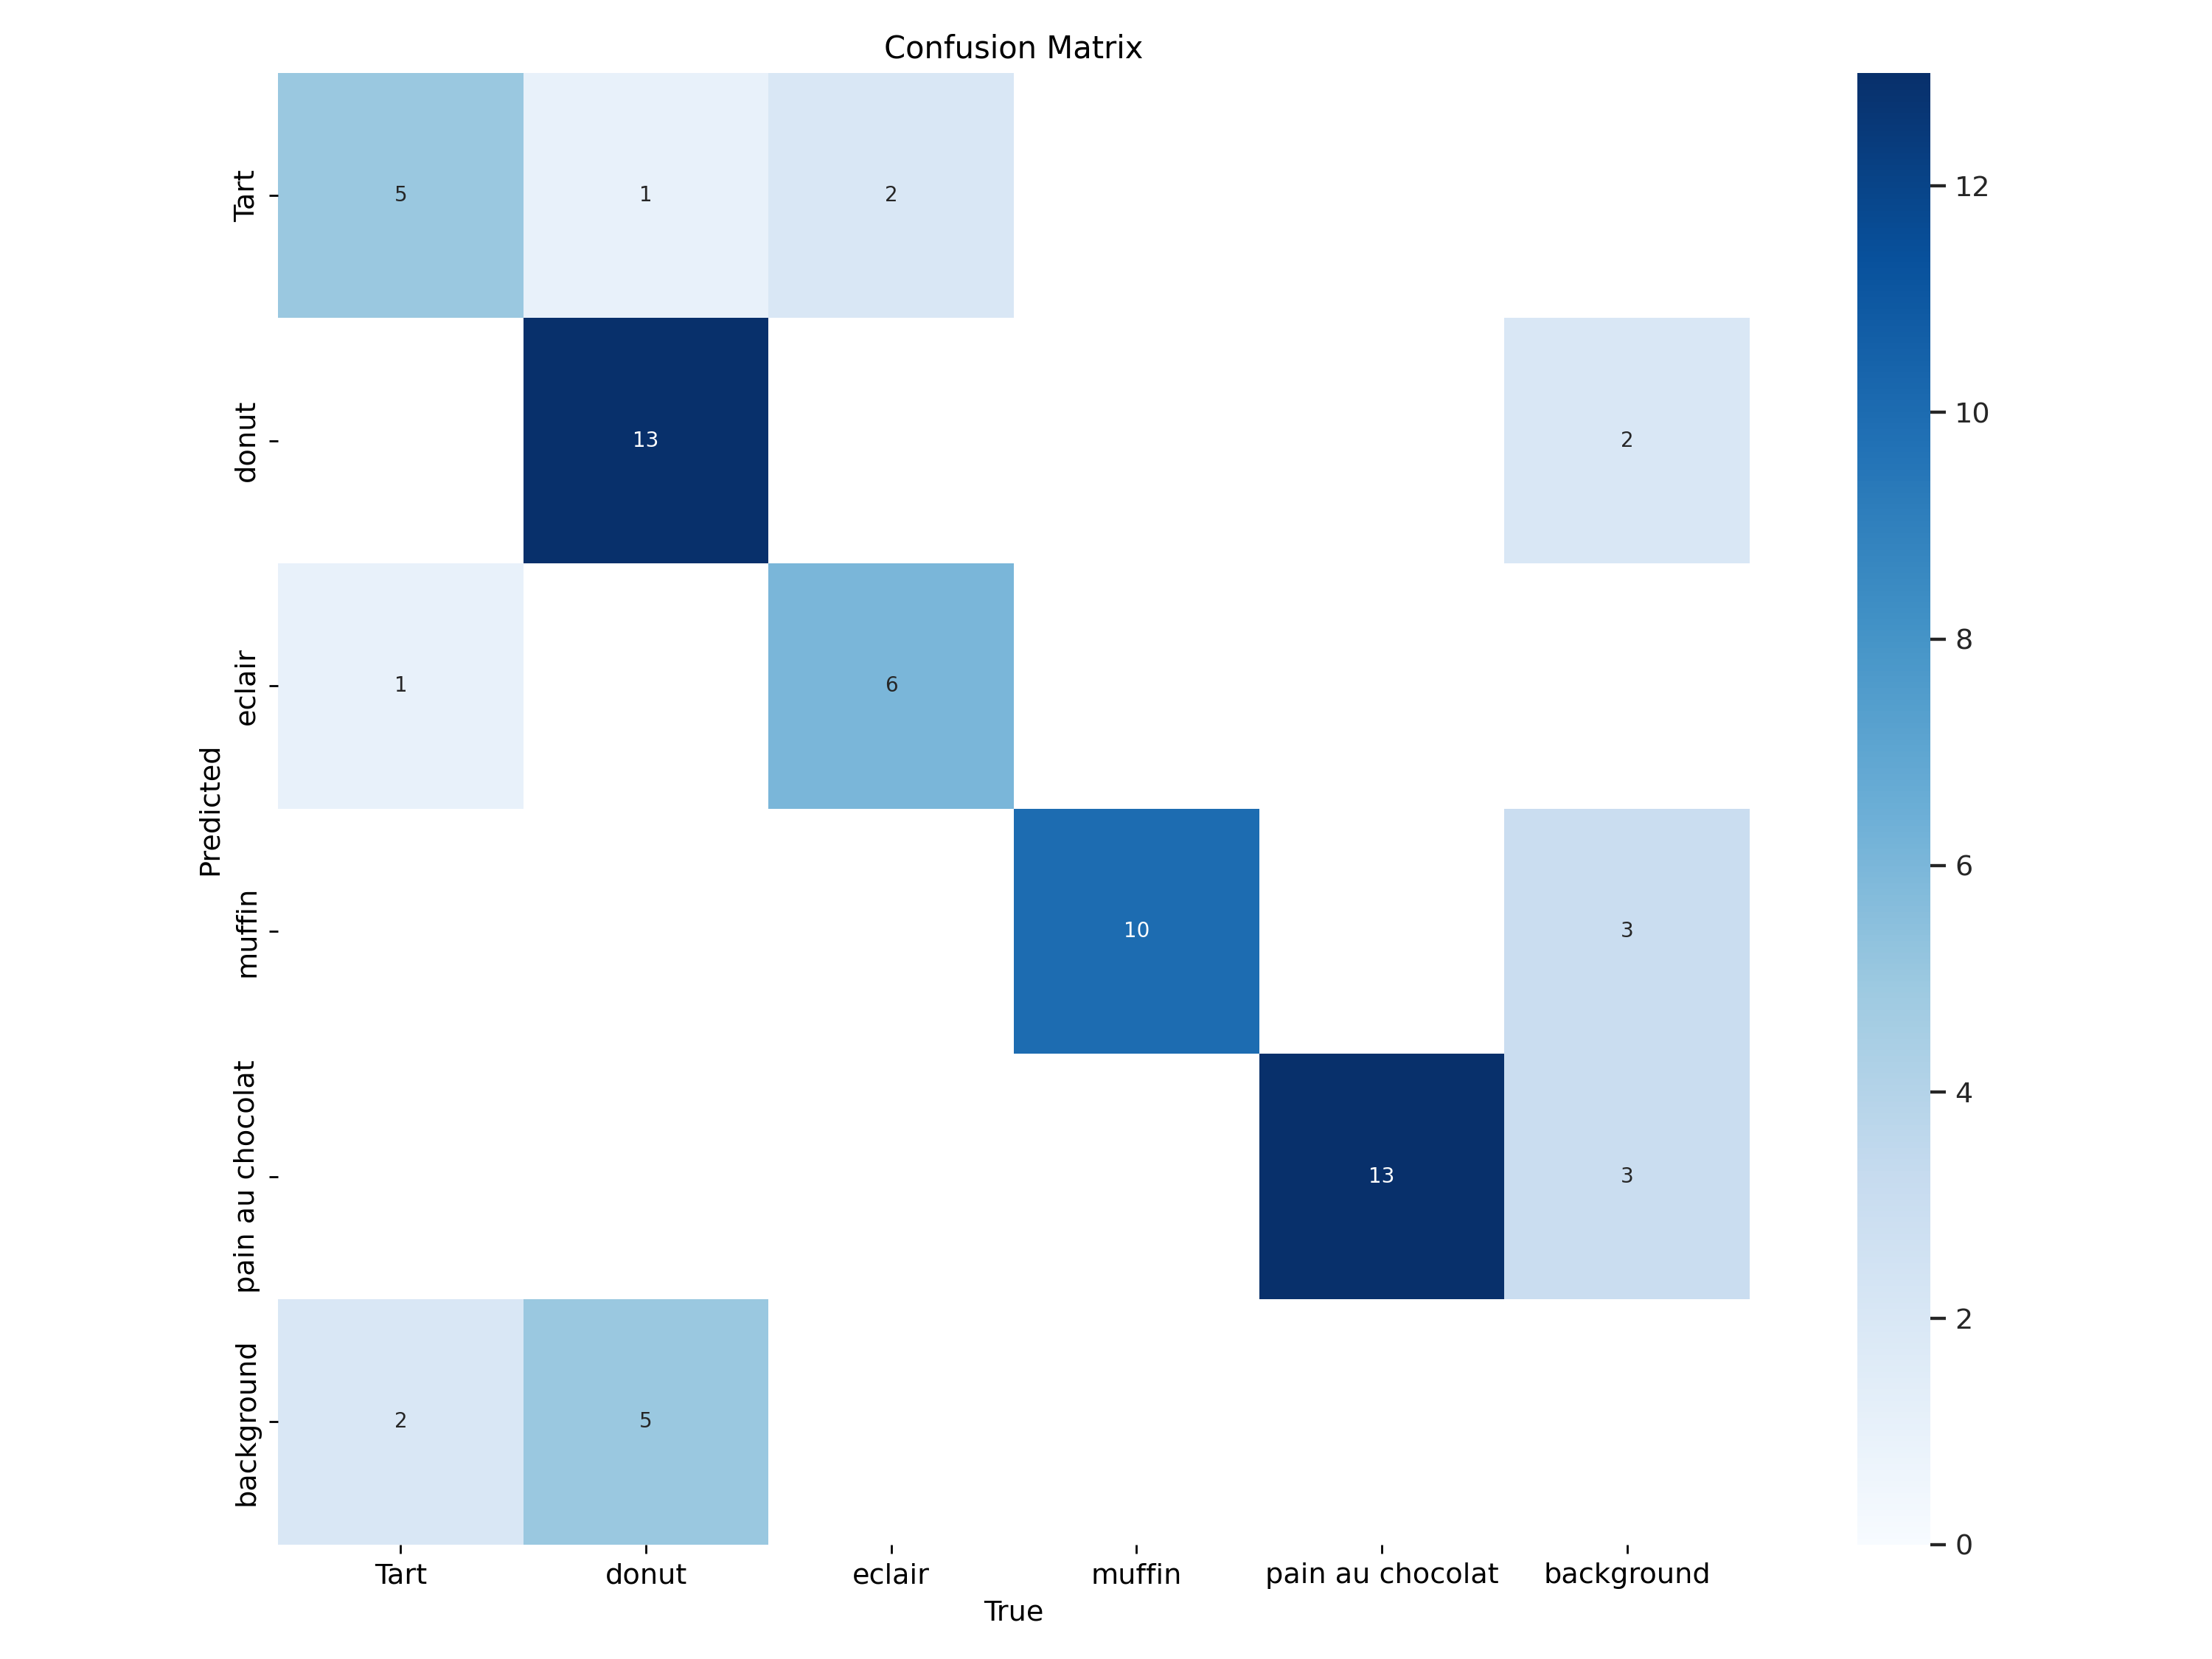

In [17]:
IPyImage(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

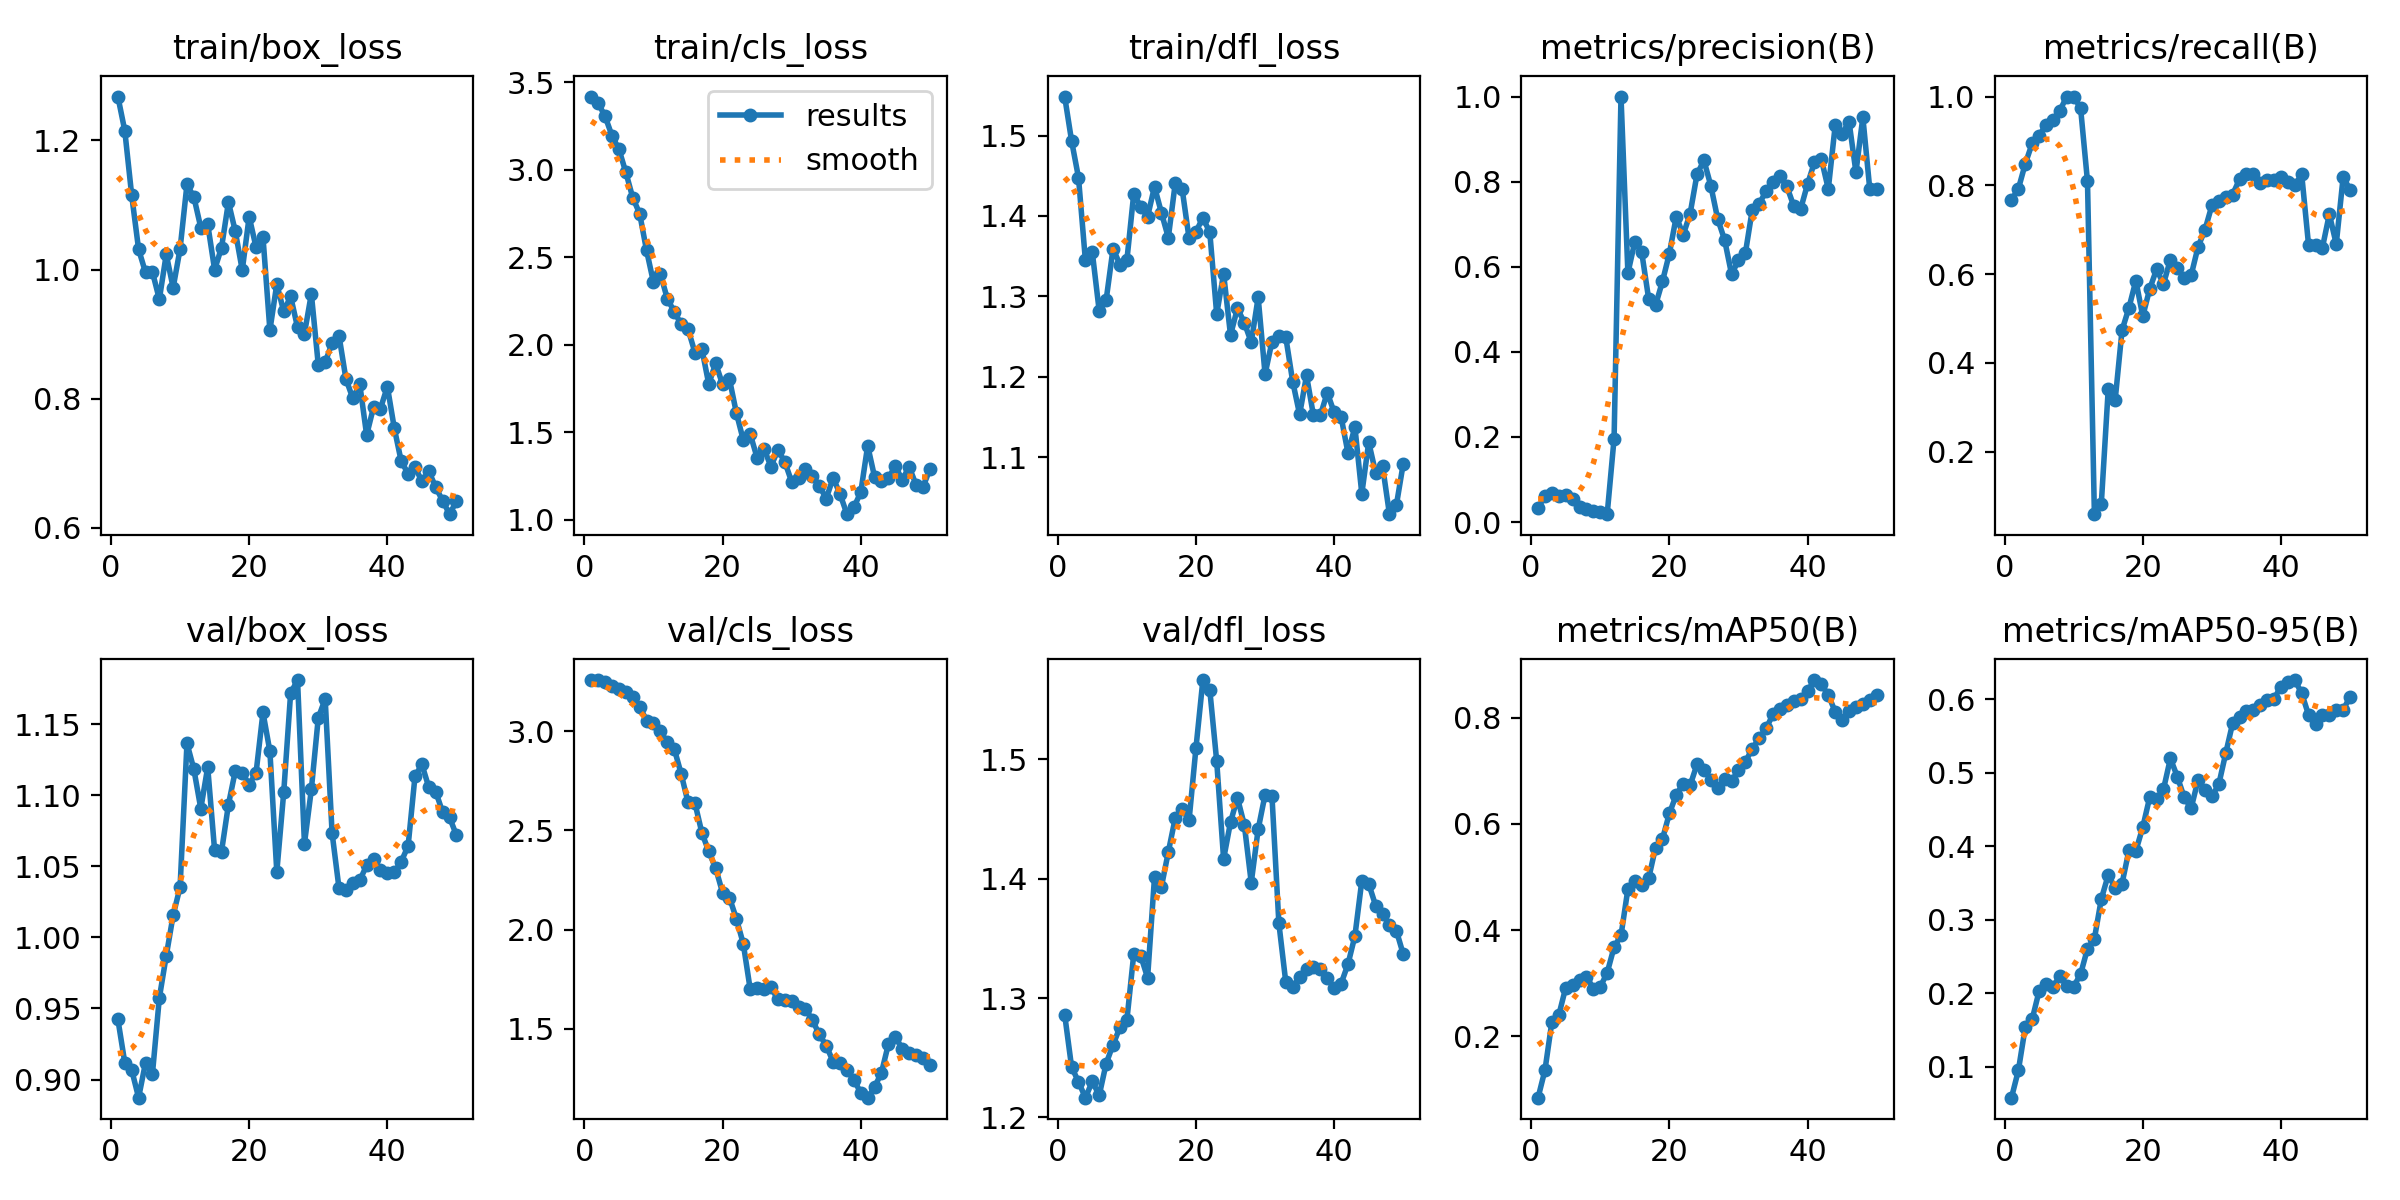

In [18]:
IPyImage(filename=f'/content/runs/detect/train3/results.png', width=600)

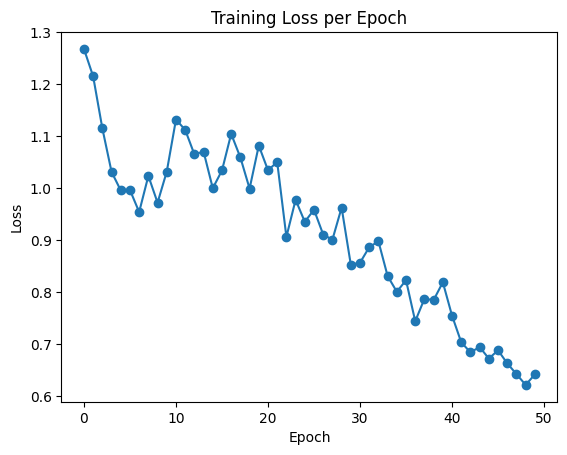

In [19]:
from matplotlib import pyplot as plt
import pandas as pd

csv_path  = "/content/runs/detect/train3/results.csv"

df = pd.read_csv(csv_path)
loss_values = df["train/box_loss"]
# Assuming 'results' is a list of loss values per epoch
plt.plot(loss_values, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Observations:
- The model is more stable and performs better around epoch 49.
- We'll retrain with 49 epochs to see if we can capture the best point.

In [20]:
model3.train(data=f"{DATASET_PATH}/data.yaml", epochs=49, imgsz=640, batch=16, patience=20, lr0=0.01, lrf=0.0001,plots=True)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/data.yaml, epochs=49, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/train/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 49 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/49      2.74G     0.7642      1.099      1.161         21        640: 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         20         58      0.817      0.831      0.857      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/49       2.5G     0.7512      1.037      1.145         31        640: 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         20         58      0.856      0.885      0.894      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/49      2.48G       0.77      1.054       1.19         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         20         58      0.881      0.879      0.876      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/49      2.51G     0.7566     0.9998       1.11         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         20         58      0.832      0.812      0.826      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/49      2.51G       0.78       1.09       1.15         32        640: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         20         58      0.831      0.809      0.813      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/49      2.51G     0.6982     0.9901      1.058         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         20         58      0.749      0.815      0.783      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/49       2.5G     0.7373     0.9377      1.107         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         58      0.666      0.739      0.705      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/49       2.5G     0.7626      1.032      1.142         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         58      0.694      0.592      0.686      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/49      2.51G     0.6714     0.9321      1.075         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         20         58      0.762      0.521      0.656      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/49       2.5G     0.7941      1.031      1.122         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         20         58      0.765       0.49      0.605      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/49      2.49G      0.819      1.053       1.17         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         20         58      0.777      0.539       0.64      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/49       2.5G     0.8194      1.019      1.165         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20         58      0.826      0.543      0.635      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/49       2.5G       0.73      1.022      1.094         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20         58      0.693      0.631      0.624       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/49       2.5G     0.7544      1.011      1.134         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         20         58       0.74      0.591      0.654      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/49       2.5G     0.6902      1.033      1.102         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         20         58      0.626      0.613      0.584      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/49       2.5G     0.7635       1.05      1.124         39        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         20         58      0.702      0.498      0.508      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/49      2.49G     0.7791      1.162      1.137         19        640: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20         58      0.705      0.527      0.618      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/49       2.5G     0.7951      1.031      1.152         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         58      0.534      0.682      0.648      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/49       2.5G     0.7379       1.07      1.131         19        640: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         20         58      0.597      0.712      0.702      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/49       2.5G     0.7704     0.9699      1.129         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         58      0.575      0.586      0.657      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/49      2.47G     0.7845      1.128      1.176         29        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         20         58      0.507      0.615      0.594      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/49      2.51G     0.7607      1.022      1.125         38        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         20         58      0.461      0.589      0.562      0.403
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



22 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 5.5MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


                   all         20         58      0.858      0.883      0.894      0.648
                  Tart          4          8      0.644      0.906      0.823      0.635
                 donut          4         19          1       0.77      0.895       0.56
                eclair          4          8          1       0.74      0.821      0.645
                muffin          4         10      0.828          1       0.94      0.588
      pain au chocolat          4         13      0.816          1       0.99      0.811
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c69db025b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

## **11. Validate the Fine-Tuned Model**



In [22]:
best_model = YOLO("/content/runs/detect/train32/weights/best.pt")

best_metrics = best_model.val()

print("mAP50-95:", best_metrics.box.map)
print("mAP50:", best_metrics.box.map50)
print("mAP75:", best_metrics.box.map75)
print("Per-class mAP50-95:", best_metrics.box.maps)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/pastry_object_detection_computer_vision/dataset/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


                   all         20         58      0.925      0.842      0.899      0.649
                  Tart          4          8      0.873      0.858      0.861      0.661
                 donut          4         19          1      0.696      0.894       0.56
                eclair          4          8          1      0.734      0.822      0.646
                muffin          4         10      0.904          1       0.94      0.589
      pain au chocolat          4         13      0.848      0.923      0.976      0.788
Speed: 11.0ms preprocess, 20.1ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.648698482281563
mAP50: 0.8986681042989118
mAP75: 0.7849279467714527
Per-class mAP50-95: [    0.66067     0.56037     0.64559     0.58885     0.78801]


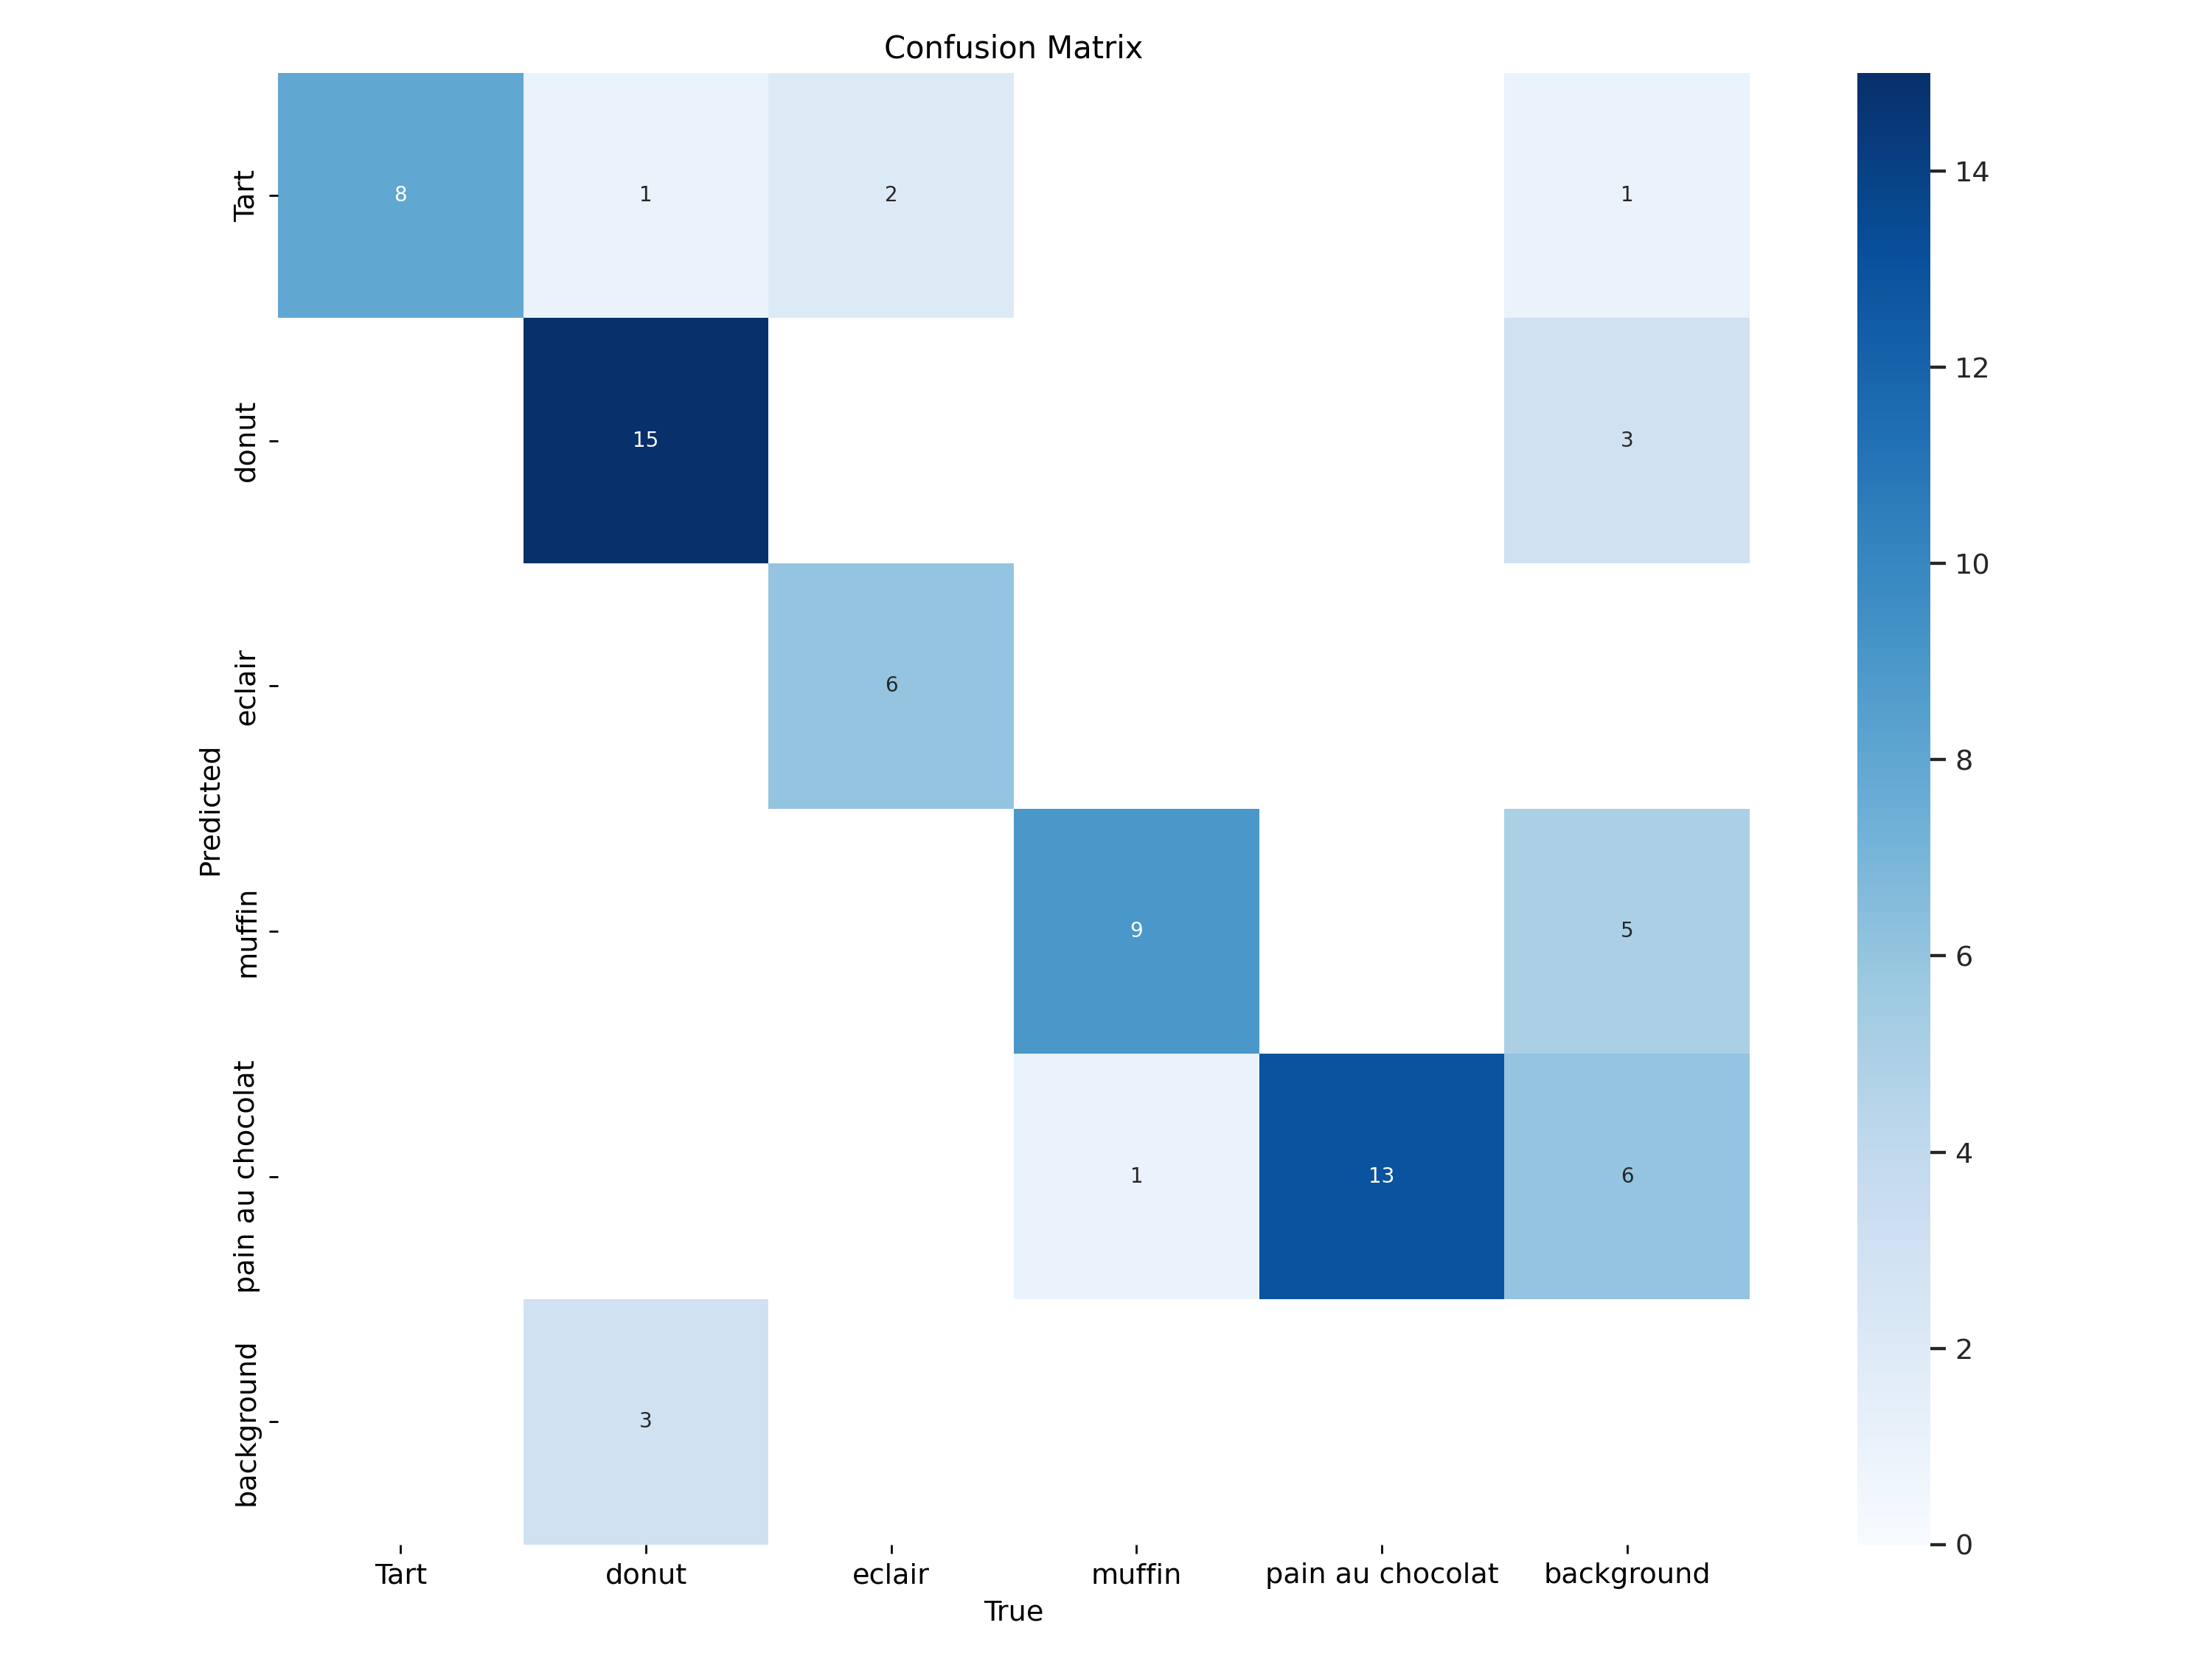

In [23]:
IPyImage(filename=f'/content/runs/detect/val/confusion_matrix.png', width=600)

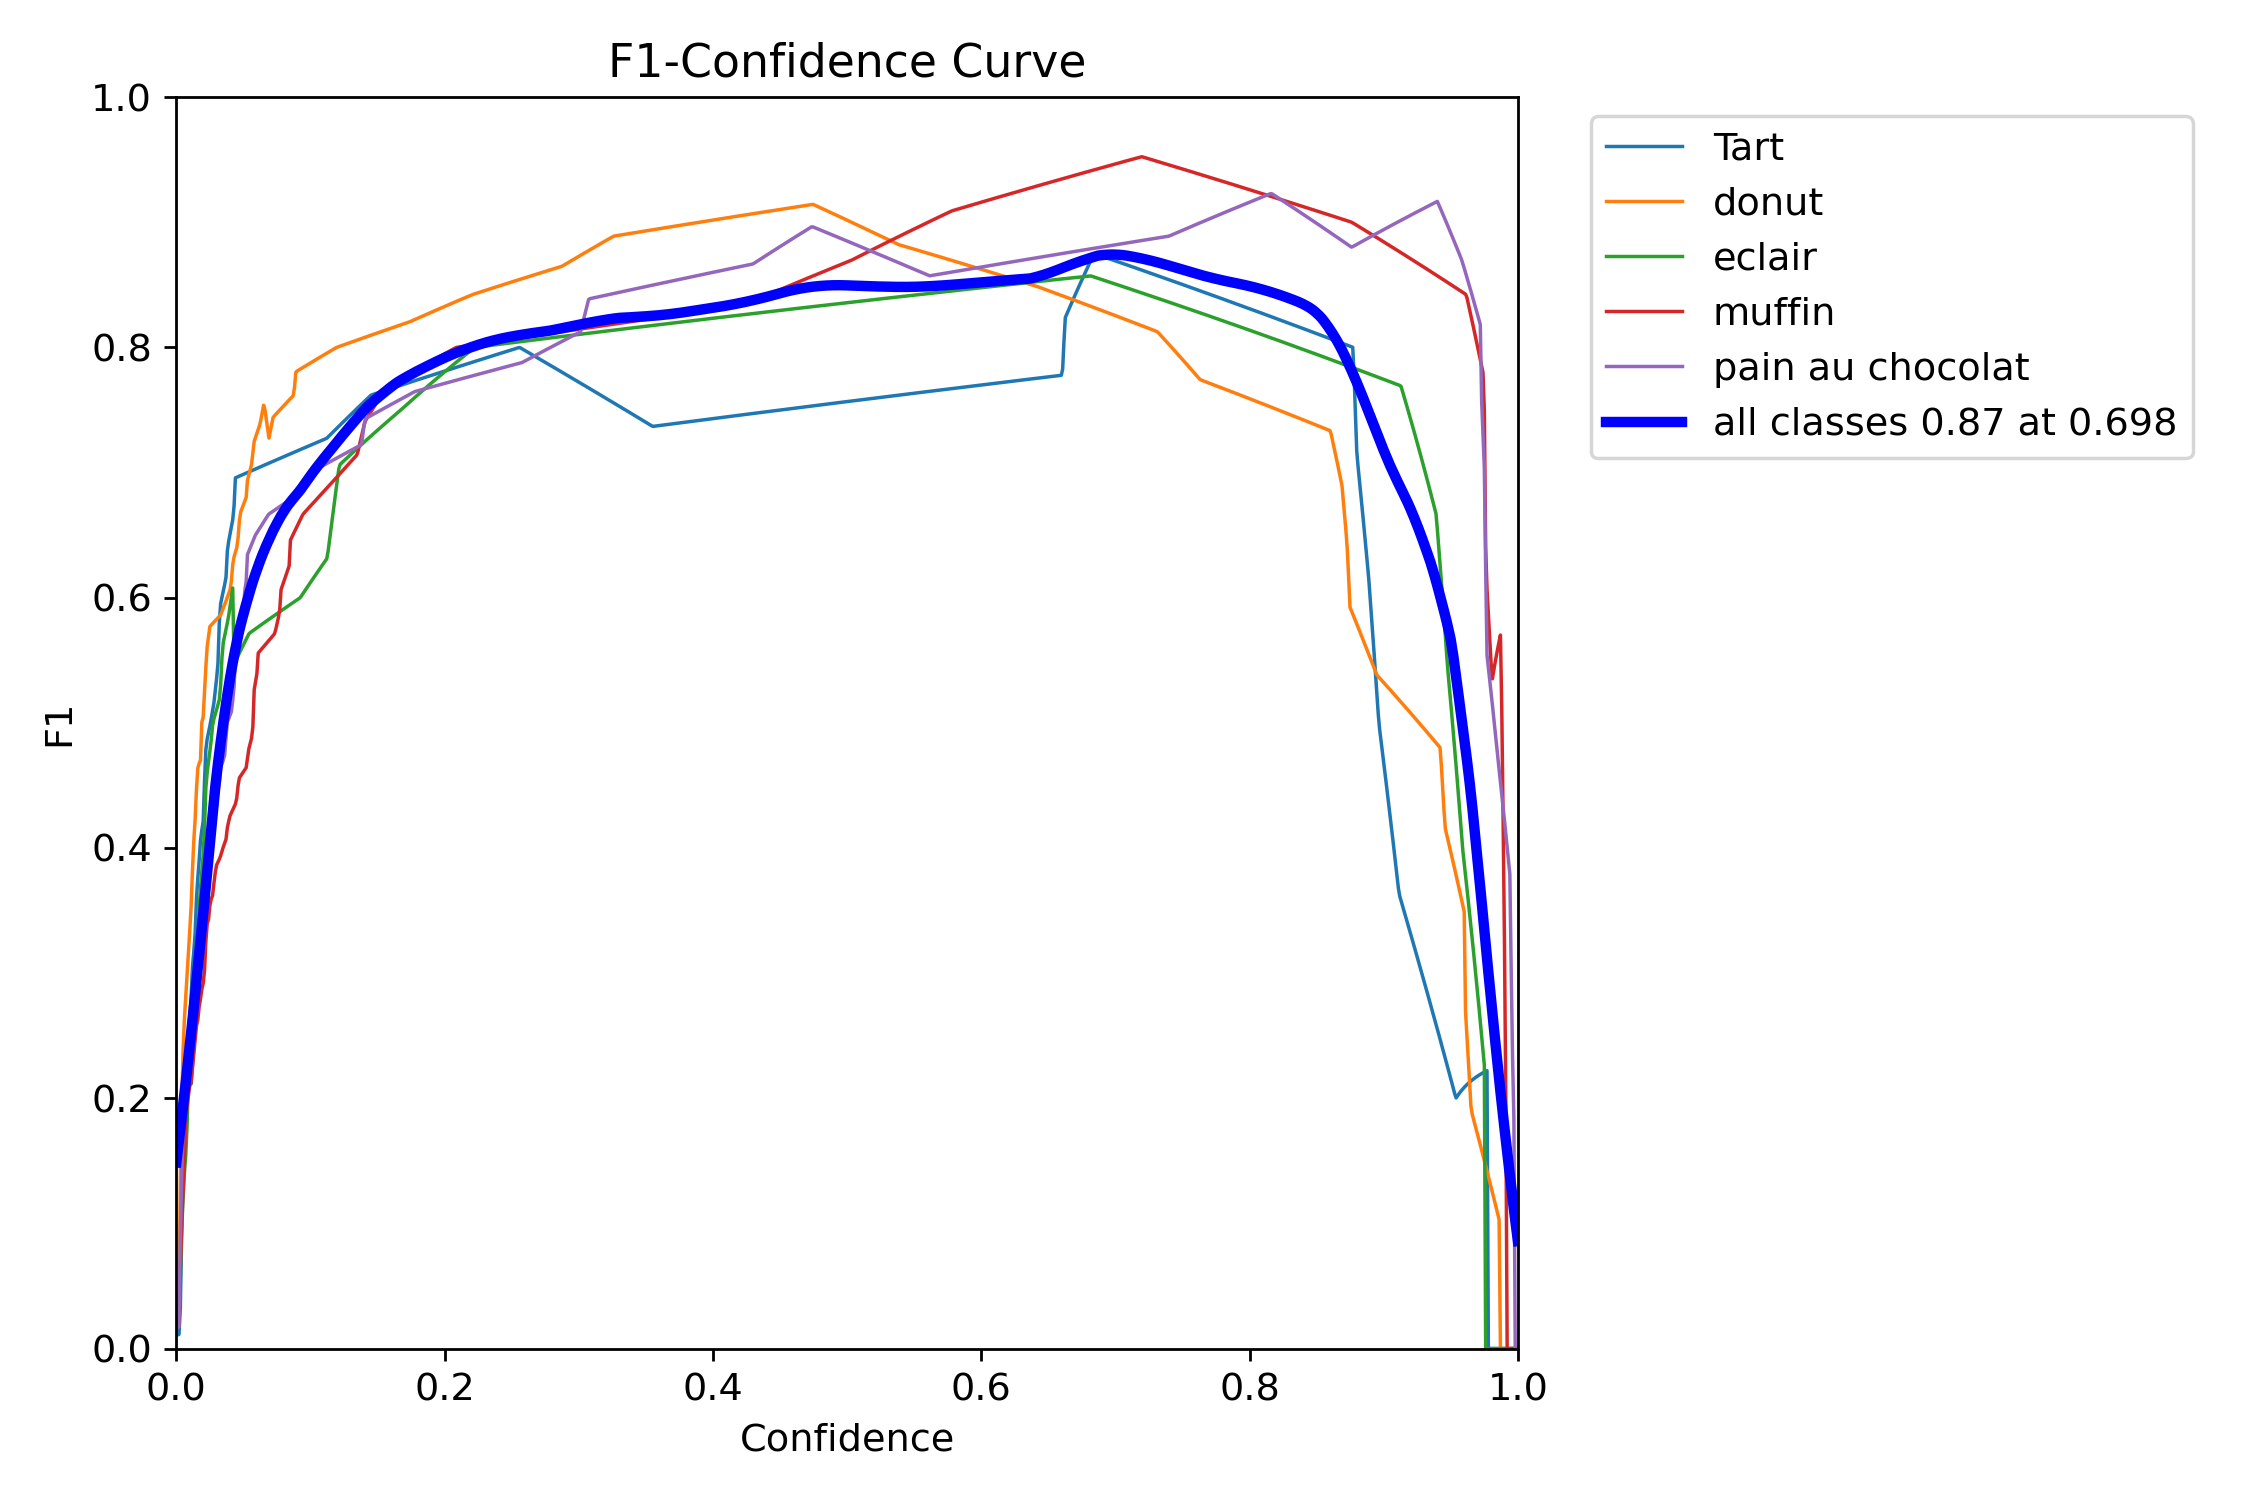

In [24]:
IPyImage(filename=f'/content/runs/detect/val/F1_curve.png', width=600)

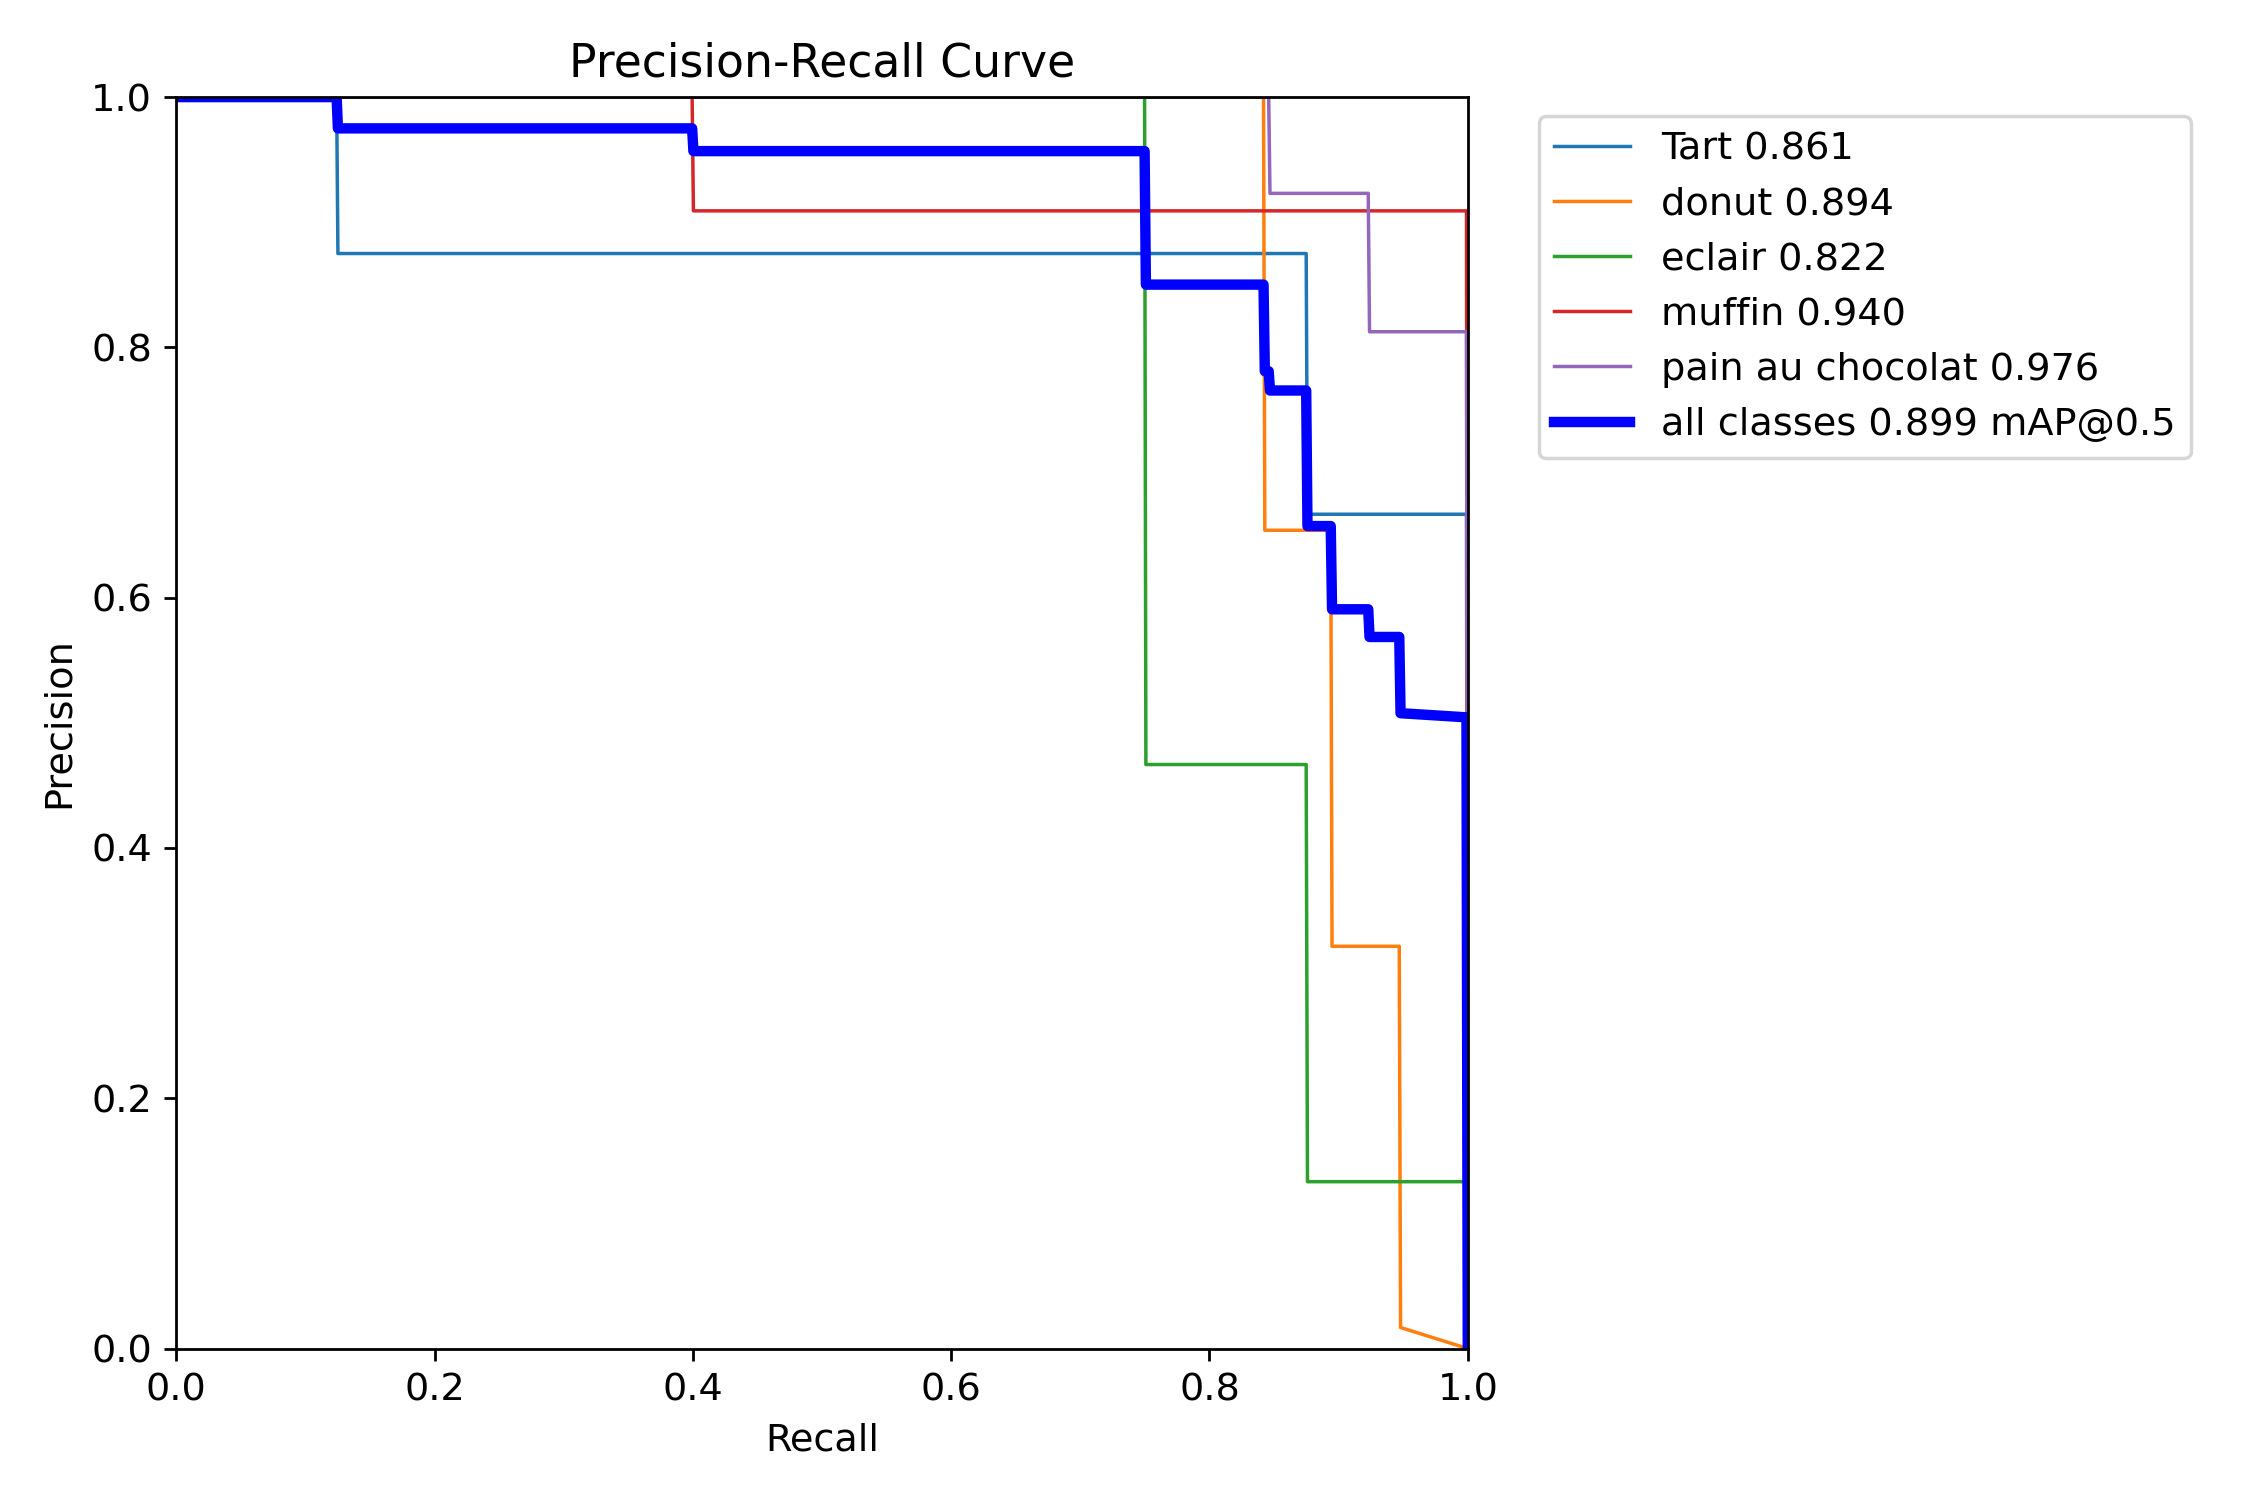

In [25]:
IPyImage(filename=f'/content/runs/detect/val/PR_curve.png', width=600)

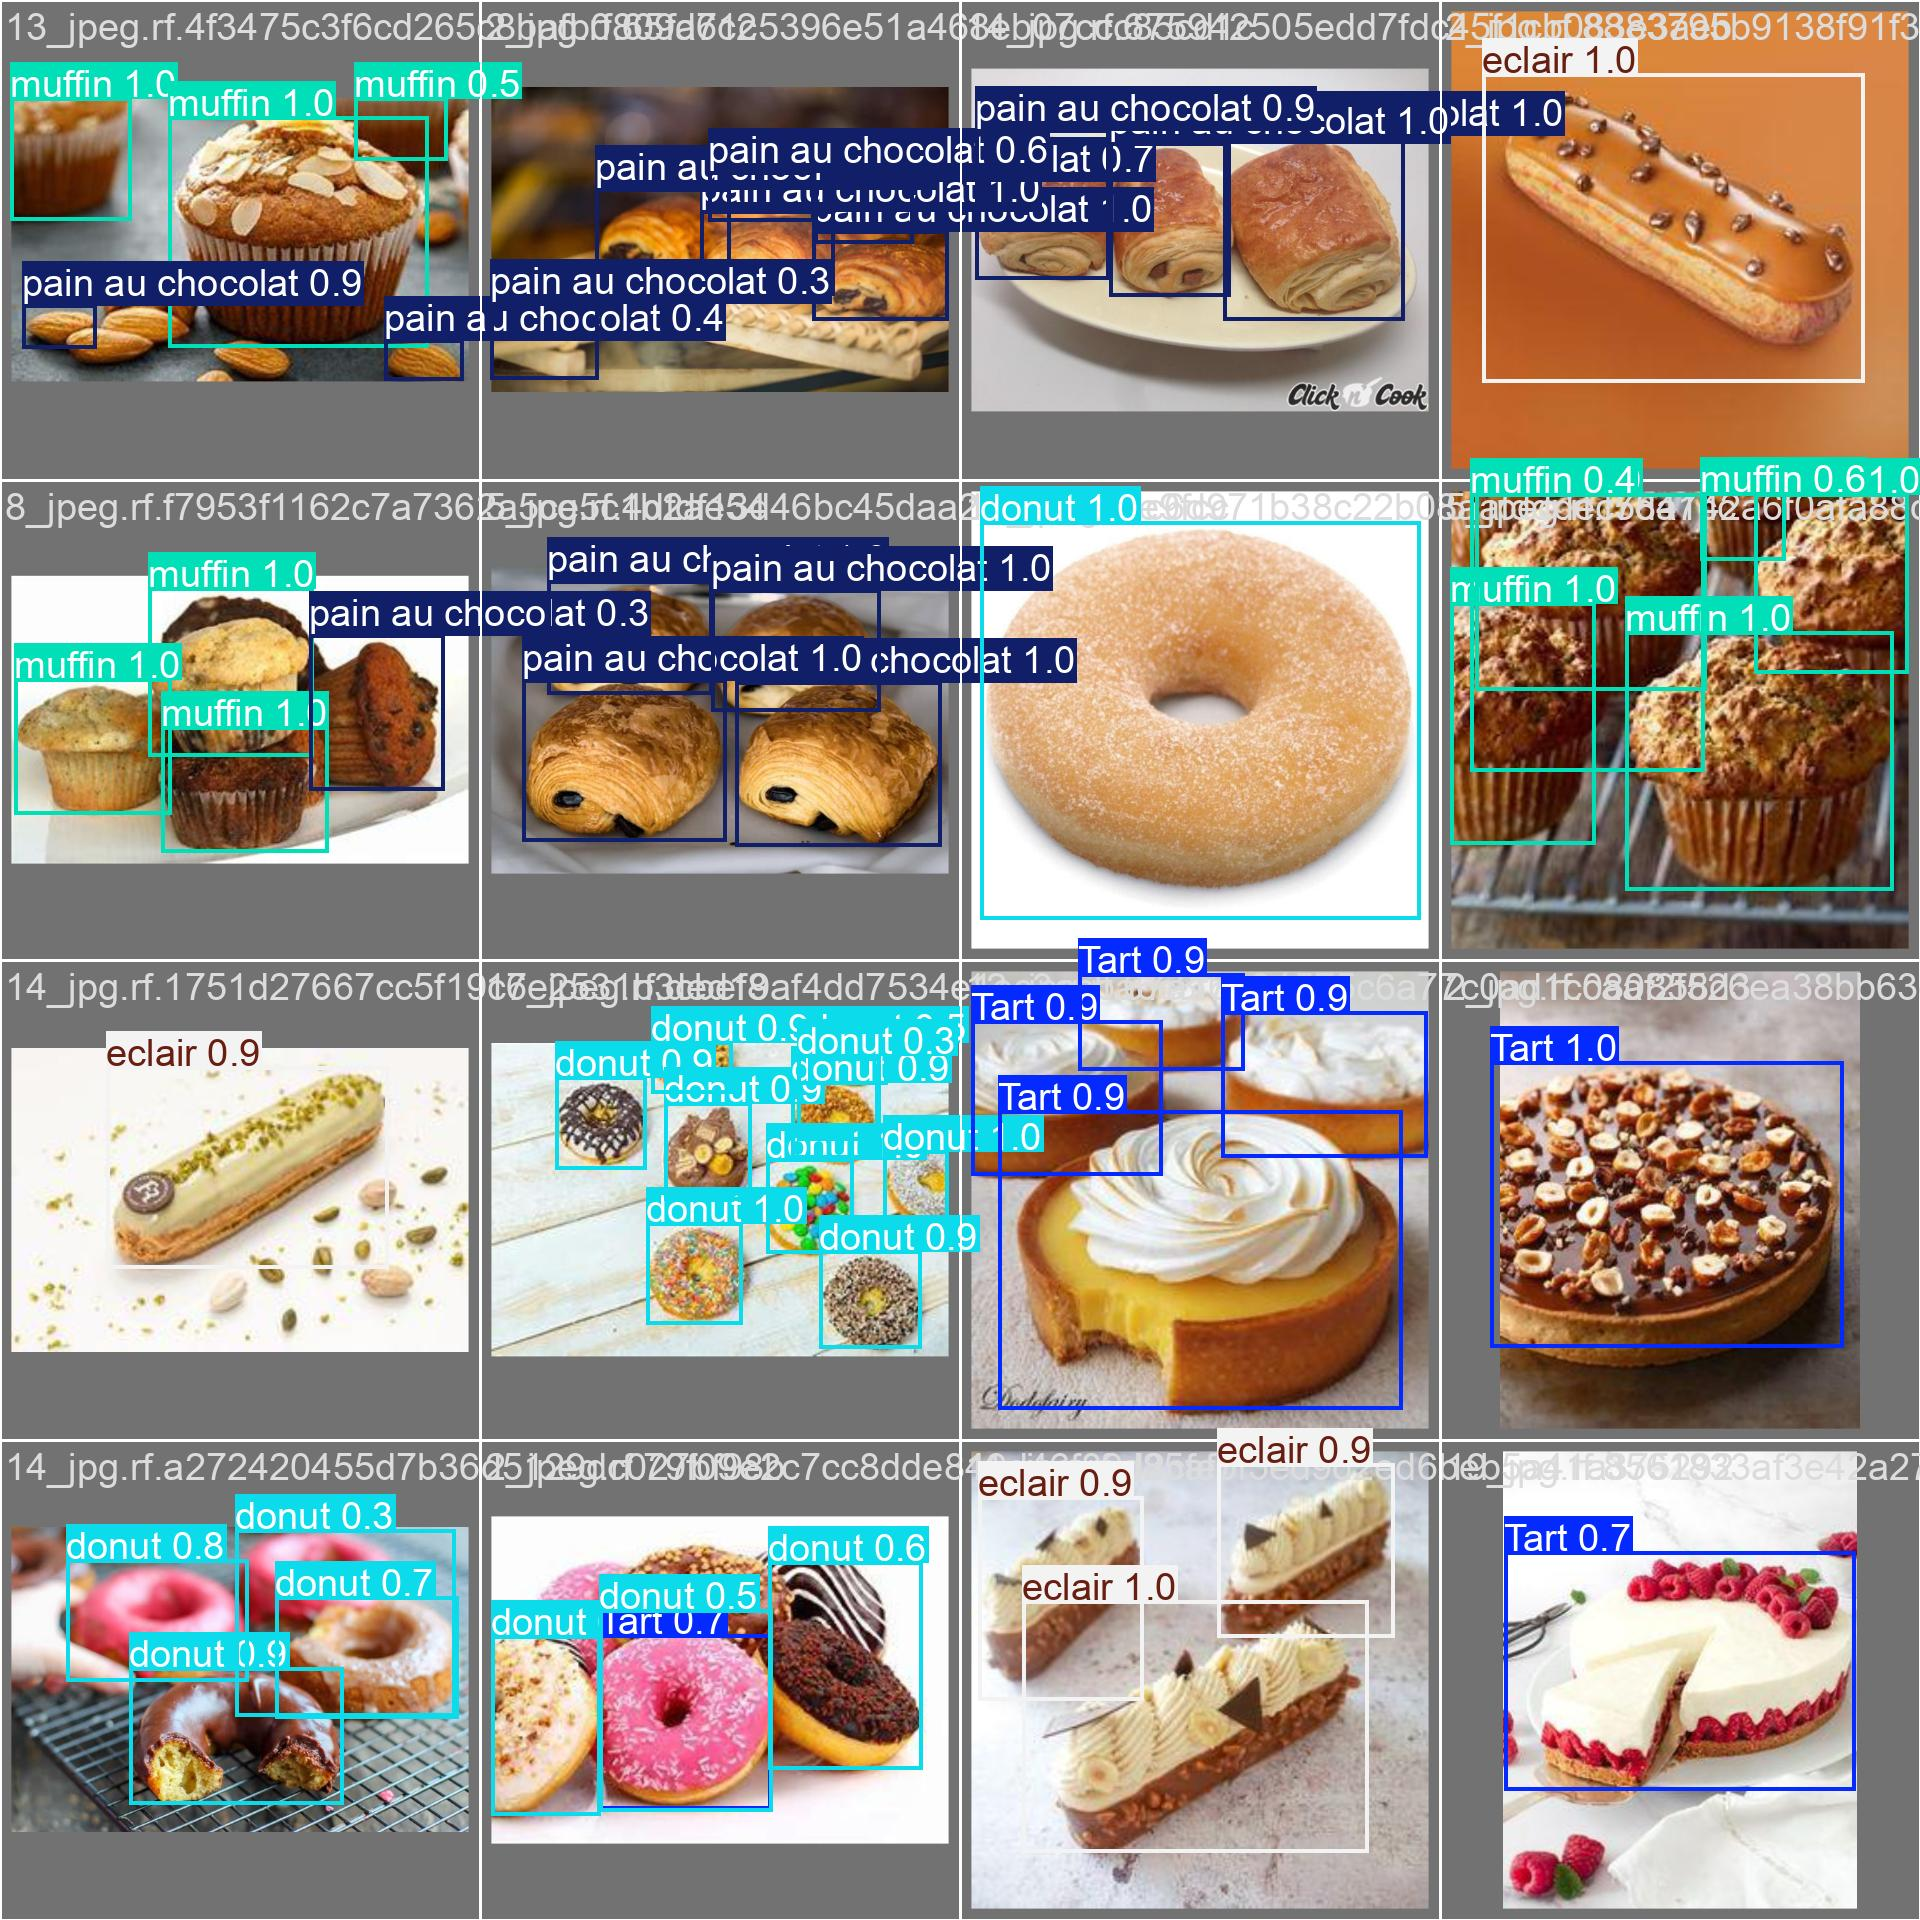

In [26]:
IPyImage(filename=f'/content/runs/detect/val/val_batch0_pred.jpg', width=600)

## **12. Export the Model**


In [27]:
best_model.export(format="onnx")


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train32/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 302.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 181.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 180.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 185.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 16.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...

'/content/runs/detect/train32/weights/best.onnx'

## **13. Save Results to Google Drive**

In [29]:
!mkdir -p /content/drive/MyDrive/mon_projet_yolo/train
!mkdir -p /content/drive/MyDrive/mon_projet_yolo/val

In [30]:
!cp -r /content/runs/detect/train32 /content/drive/MyDrive/mon_projet_yolo/train

!cp -r /content/runs/detect/val /content/drive/MyDrive/mon_projet_yolo/val
